<h1 style="color:#2E86C1;"> Portfolio Construction, Backtesting, and Optimisation (2020–2024)</h1>

<h2 style="color:#1A5276;"> Background</h2>

<p style="color:#17202A;">
This project simulates the role of a <strong>Portfolio Manager</strong> at an asset management company. The objective is to construct a diversified stock portfolio, backtest a quantitative trading strategy, and implement optimisation techniques to enhance returns and manage risk.
</p>

<p style="color:#17202A;">
Over the five-year period from <strong>2020 to 2024</strong>, we will select <strong>10 actively traded stocks</strong>, implement a <strong>mean reversion strategy using Bollinger Bands</strong>, and explore portfolio-level performance under different allocation methodologies. The final goal is to assess the effectiveness of each approach and provide an informed investment recommendation.
</p>

<hr style="border:1px solid #AED6F1;">

<h2 style="color:#1A5276;"> Objectives</h2>

<ul style="color:#17202A;">
  <li><strong>Data Retrieval and Cleaning</strong><br>
  Collect historical data (2020–2024) from Yahoo Finance, clean and preprocess it, and resolve missing values with justification.</li><br>

  <li><strong>Data Exploration</strong><br>
  Explore and visualise the price movements of the selected stocks.</li><br>

  <li><strong>Backtesting: Bollinger Bands Strategy</strong><br>
  Apply a mean reversion strategy using Bollinger Bands. Generate trading signals and compare returns with a buy-and-hold strategy.</li><br>

  <li><strong>Portfolio Construction and Analysis</strong><br>
  Construct an equally weighted portfolio and analyse its returns, standard deviation, and inter-asset correlations.</li><br>

  <li><strong>Portfolio Optimisation</strong><br>
  Perform Sharpe Ratio-based optimisation and AI-assisted optimisation. Visually compare their cumulative performance.</li><br>

  <li><strong>Reporting and Recommendation</strong><br>
  Conclude with a strategy evaluation and final recommendation supported by data and visual evidence.</li>
</ul>

<hr style="border:1px solid #AED6F1;">


## Importing Required Libraries

To begin the analysis, we import several essential Python libraries:

- **`yfinance`**: Used to retrieve historical stock market data from Yahoo Finance.
- **`pandas`**: Provides powerful data structures (like DataFrames) for data cleaning, manipulation, and analysis.
- **`numpy`**: Offers support for efficient numerical operations, especially for arrays and time-series computations.
- **`matplotlib.pyplot`**: A plotting library used to create visualizations such as line charts and heatmaps, which help us better understand stock price trends and data quality.
- **`seaborn`**: Built on top of `matplotlib`, Seaborn makes it easier to create attractive and informative statistical graphics. Here, we use it for heatmaps and correlation plots.

Together, these libraries form the core toolkit for data handling, visual exploration, and preparation in this portfolio analysis.


In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Retrieval and Preparation

In this section, we retrieve historical stock data for ten actively traded companies, selected from different sectors to ensure portfolio diversification. The data is sourced from **Yahoo Finance**, covering the period from **January 1, 2020 to December 31, 2024**.

The selected tickers are:

- **AAPL** (Apple Inc.)
- **MSFT** (Microsoft Corporation)
- **GOOGL** (Alphabet Inc.)
- **AMZN** (Amazon.com, Inc.)
- **TSLA** (Tesla, Inc.)
- **JNJ** (Johnson & Johnson)
- **NVDA** (NVIDIA Corporation)
- **XOM** (Exxon Mobil Corporation)
- **JPM** (JPMorgan Chase & Co.)
- **UNH** (UnitedHealth Group)

These stocks were chosen to represent a **cross-sectoral portfolio** including technology, consumer discretionary, healthcare, energy, and financial services. This selection aims to:

- Capture diverse market dynamics and reduce sector-specific risks.
- Include industry leaders with strong liquidity and consistent trading volumes.
- Reflect growth-oriented companies (e.g., tech giants) alongside defensive and cyclical stocks, enhancing portfolio balance.

For each ticker:

- Historical daily price data is downloaded using the `yfinance` library.
- A `"Ticker"` column is added to identify the stock symbol within the merged dataset.
- The datasets are combined into a single multi-stock DataFrame named `multi_df`.

Finally, the full dataset is exported to a CSV file named `portfolio_data.csv` for future analysis and reproducibility.


In [ ]:
# Define tickers (cross-sectoral)
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'JNJ', 'NVDA', 'XOM', 'JPM', 'UNH']
groups = []

for ticker in tickers:
    data = yf.download(ticker, start="2020-01-01", end="2024-12-31", auto_adjust=False) # auto_adjust=False to get raw prices, not adjusted for dividends
    data.columns = data.columns.droplevel(1) # drop the second level of column names
    data = data.reset_index()
    data.insert(0, "Ticker", ticker)
    groups.append(data)

multi_df = pd.concat(groups)

# Save Adjusted Close prices to CSV
multi_df.to_csv('portfolio_data.csv', index=False)

# Display the Data Frame 
multi_df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Price,Ticker,Date,Adj Close,Close,High,Low,Open,Volume
0,AAPL,2020-01-02,72.620850,75.087502,75.150002,73.797501,74.059998,135480400
1,AAPL,2020-01-03,71.914833,74.357498,75.144997,74.125000,74.287498,146322800
2,AAPL,2020-01-06,72.487846,74.949997,74.989998,73.187500,73.447502,118387200
3,AAPL,2020-01-07,72.146942,74.597504,75.224998,74.370003,74.959999,108872000
4,AAPL,2020-01-08,73.307518,75.797501,76.110001,74.290001,74.290001,132079200
...,...,...,...,...,...,...,...,...
1252,UNH,2024-12-23,500.631378,506.339996,508.779999,499.049988,500.760010,4286000
1253,UNH,2024-12-24,500.394104,506.100006,506.100006,500.589996,504.399994,1824400
1254,UNH,2024-12-26,505.387146,511.149994,512.219971,504.730011,505.649994,3387000
1255,UNH,2024-12-27,504.240234,509.989990,513.179993,507.799988,509.420013,3471800


### Reshaping Data: Wide Format of Adjusted Close Prices

To facilitate time series analysis and comparison across stocks, the combined dataset `multi_df` is transformed into a **wide-format DataFrame** named `adj_close`. 

Here:

- The `Date` column becomes the **index**.
- Each stock's ticker symbol becomes a **column**.
- The values correspond to the **Adjusted Close** prices for each stock on each trading day.

This structure allows for easy visualization and calculation of portfolio-level metrics such as returns and correlations.


In [ ]:
# Pivot the multi_df to get a wide DataFrame of Adjusted Close prices
adj_close = multi_df.pivot(index="Date", columns="Ticker", values="Adj Close").sort_index()

# Display the data frame
adj_close

Ticker,AAPL,AMZN,GOOGL,JNJ,JPM,MSFT,NVDA,TSLA,UNH,XOM
Date,,,,,,,,,,
2020-01-02,72.620850,94.900497,68.026016,124.983673,120.733574,153.042297,5.971747,28.684000,268.711060,54.634789
2020-01-03,71.914833,93.748497,67.670151,123.536644,119.140305,151.136642,5.876162,29.534000,265.991730,54.195545
2020-01-06,72.487846,95.143997,69.473846,123.382545,119.045578,151.527267,5.900805,30.102667,267.838226,54.611664
2020-01-07,72.146942,95.343002,69.339645,124.136024,117.021713,150.145676,5.972245,31.270666,266.221497,54.164722
2020-01-08,73.307518,94.598503,69.833183,124.118896,117.934616,152.537277,5.983446,32.809334,271.834564,53.347904
...,...,...,...,...,...,...,...,...,...,...
2024-12-23,254.655716,225.059998,194.171051,142.891403,235.713257,433.583038,139.647446,430.600006,500.631378,104.396103
2024-12-24,257.578674,229.050003,195.647552,143.461914,239.589233,437.647400,140.197372,462.279999,500.394104,104.494308
2024-12-26,258.396667,227.050003,195.138763,143.196320,240.409912,436.432068,139.907410,454.130005,505.387146,104.582695


###  Missing Data Inspection in Data Frame

To ensure the dataset's integrity, we conduct a detailed check for missing values in the combined long-format DataFrame `multi_df`. This DataFrame contains multiple columns such as 'Open', 'High', 'Low', 'Close', 'Adj Close', and 'Volume' for each stock ticker.

- We group the data by the `Ticker` column to summarize missing values per stock.
- For each group, we calculate the count of missing entries per relevant column (excluding the grouping column itself to avoid warnings).
- Finally, we verify the total number of missing values across the entire DataFrame.

This process helps identify any data gaps that could affect downstream analyses like backtesting or portfolio optimisation, allowing us to apply targeted cleaning or imputation strategies if necessary.


In [ ]:
missing_summary = multi_df.drop(columns='Ticker').groupby(multi_df['Ticker']).apply(lambda df: df.isnull().sum())

print("Missing values per Ticker and column:")
print(missing_summary)

# Confirm the total number of missing values in the multi_df is zero
total_missing = multi_df.isnull().sum().sum()
print(f"\nTotal missing values in multi_df: {total_missing}")

Missing values per Ticker and column:
Price   Date  Adj Close  Close  High  Low  Open  Volume
Ticker                                                 
AAPL       0          0      0     0    0     0       0
AMZN       0          0      0     0    0     0       0
GOOGL      0          0      0     0    0     0       0
JNJ        0          0      0     0    0     0       0
JPM        0          0      0     0    0     0       0
MSFT       0          0      0     0    0     0       0
NVDA       0          0      0     0    0     0       0
TSLA       0          0      0     0    0     0       0
UNH        0          0      0     0    0     0       0
XOM        0          0      0     0    0     0       0

Total missing values in multi_df: 0


#### ✅ **Missing Data Check Results**

After thorough inspection of the dataset, **no missing values were detected** in any of the columns for all selected stocks across the entire date range.

This confirms that the dataset is complete and reliable for subsequent analysis, eliminating the need for data imputation or cleaning related to missing entries.


###  Data Exploration: Adjusted Close Prices

This section presents an overview of the adjusted closing prices for all selected stocks:

- The **head** and **tail** of the `adj_close` DataFrame display the first and last five rows, providing a snapshot of price data at the start and end of the period.
- A line plot visualizes the adjusted closing price trends for all ten stocks over the full 2020 to 2024 period, allowing us to compare their relative performance and volatility visually.


Head of adjusted close prices:


Ticker,AAPL,AMZN,GOOGL,JNJ,JPM,MSFT,NVDA,TSLA,UNH,XOM
Date,,,,,,,,,,
2020-01-02,72.620850,94.900497,68.026016,124.983673,120.733574,153.042297,5.971747,28.684000,268.711060,54.634789
2020-01-03,71.914833,93.748497,67.670151,123.536644,119.140305,151.136642,5.876162,29.534000,265.991730,54.195545
2020-01-06,72.487846,95.143997,69.473846,123.382545,119.045578,151.527267,5.900805,30.102667,267.838226,54.611664
2020-01-07,72.146942,95.343002,69.339645,124.136024,117.021713,150.145676,5.972245,31.270666,266.221497,54.164722
2020-01-08,73.307518,94.598503,69.833183,124.118896,117.934616,152.537277,5.983446,32.809334,271.834564,53.347904


Tail of adjusted close prices:


Ticker,AAPL,AMZN,GOOGL,JNJ,JPM,MSFT,NVDA,TSLA,UNH,XOM
Date,,,,,,,,,,
2024-12-23,254.655716,225.059998,194.171051,142.891403,235.713257,433.583038,139.647446,430.600006,500.631378,104.396103
2024-12-24,257.578674,229.050003,195.647552,143.461914,239.589233,437.647400,140.197372,462.279999,500.394104,104.494308
2024-12-26,258.396667,227.050003,195.138763,143.196320,240.409912,436.432068,139.907410,454.130005,505.387146,104.582695
2024-12-27,254.974930,223.750000,192.305450,142.675018,238.462036,428.881104,136.987885,431.660004,504.240234,104.572876
2024-12-30,251.593094,221.300003,190.789032,140.992996,236.632812,423.202911,137.467804,417.410004,502.074921,103.865776


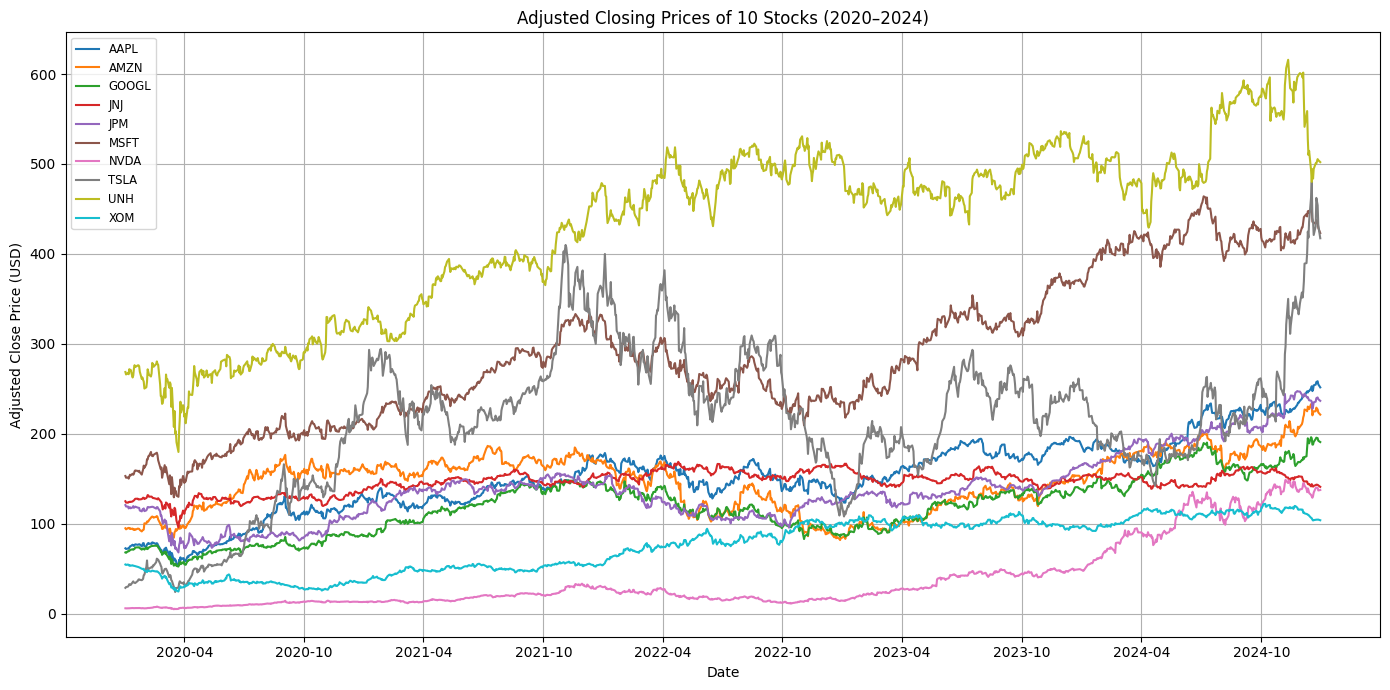

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Show the first 5 rows of adjusted close prices
print("Head of adjusted close prices:")
display(adj_close.head())

# Show the last 5 rows of adjusted close prices
print("Tail of adjusted close prices:")
display(adj_close.tail())

# Create a line plot of adjusted close prices for all tickers
plt.figure(figsize=(14, 7))

# Loop through each ticker and plot its adjusted closing price
for ticker in adj_close.columns:
    plt.plot(adj_close.index, adj_close[ticker], label=ticker)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.title('Adjusted Closing Prices of 10 Stocks (2020–2024)')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price (USD)')
plt.legend(loc='upper left', fontsize='small')
plt.grid(True)

plt.tight_layout()
plt.show()


Notably, TSLA (Tesla) shows a significant upward trend, reaching its peak around mid-2024, indicating strong market performance. UNH (UnitedHealth Group) also exhibits a steady increase, though less dramatic. In contrast, stocks like AAPL (Apple), AMZN (Amazon), GOOGL (Alphabet), MSFT (Microsoft), NVDA (NVIDIA), and XOM (Exxon Mobil) show more moderate growth with occasional fluctuations. Stocks like JNJ (Johnson & Johnson) and PM (Philip Morris) display relatively stable prices with minor variations over the period.

## Backtesting: Bollinger Bands Mean Reversion Strategy

In this section, we implement a **Bollinger Bands Mean Reversion strategy** for each stock. The strategy logic is as follows:

- Calculate the 20-day moving average (MA20) and 20-day rolling standard deviation (STD20) of adjusted close prices.
- Define the upper and lower Bollinger Bands as:
  - Upper Band = MA20 + 2 × STD20
  - Lower Band = MA20 − 2 × STD20

#### **Generate Entry Signals**

The entry signals are generated based on the position of the asset's closing price relative to the Bollinger Bands:

- **Buy Signal:** Triggered when the closing price falls **below the lower Bollinger Band**. This indicates a potential buying opportunity, as the price is expected to revert upwards toward the middle band (the 20-day moving average).

- **Sell Signal:** Triggered when the closing price rises **above the upper Bollinger Band**. This indicates a potential selling opportunity, anticipating the price will revert downwards toward the middle band.

#### **Generate Exit Signals**

Exit signals are triggered when the price reverts back to the mean (the 20-day moving average), indicating that the purpose of the trade—mean reversion—has been achieved.

- **Exit Buy Position:**  
  Exit a long position when the price **rises back to or above the middle Bollinger Band** (i.e., the 20-day moving average).  
  This suggests the asset has reverted to its mean and the buying opportunity has been realized.

- **Exit Sell Position:**  
  Exit a short position when the price **falls back to or below the middle Bollinger Band**.  
  This suggests the asset has also reverted to its mean from the upper band, and the selling position should be closed.

The `position` series records the strategy's trading stance on each day based on the signals generated:

- **1** → Long Position (Buy and hold the asset)
- **-1** → Short Position (Sell the asset and hold the short)
- **0** → No Position (Stay out of the market)


In [ ]:
strategy_returns = pd.DataFrame()
buy_hold_returns = pd.DataFrame()
cumulative_summary = {}

window = 20

for ticker in adj_close.columns:
    price = adj_close[ticker]
    ma20 = price.rolling(window).mean()
    std20 = price.rolling(window).std()
    upper_band = ma20 + 2 * std20
    lower_band = ma20 - 2 * std20

    buy_signal = ((price < lower_band) & lower_band.notna()).astype(int)
    sell_signal = ((price > upper_band) & upper_band.notna()).astype(int)
    exit_buy_signal = ((price >= ma20) & ma20.notna()).astype(int)
    exit_sell_signal = ((price <= ma20) & ma20.notna()).astype(int)

    position = pd.Series(0, index=price.index)
    current_pos = 0

    for i in range(1, len(price)):
        if current_pos == 0:
            if buy_signal.iloc[i - 1] == 1:
                current_pos = 1
            elif sell_signal.iloc[i - 1] == 1:
                current_pos = -1
        elif current_pos == 1:
            if exit_buy_signal.iloc[i] == 1:
                current_pos = 0
        elif current_pos == -1:
            if exit_sell_signal.iloc[i] == 1:
                current_pos = 0
        position.iloc[i] = current_pos

    # Calculate returns
    daily_return = price.pct_change()
    strat_return = position.shift(1) * daily_return  # Avoid lookahead
    bh_return = daily_return

    strategy_returns[ticker] = strat_return
    buy_hold_returns[ticker] = bh_return

    # Compute final cumulative returns
    cumulative_strategy = (1 + strat_return.fillna(0)).cumprod() - 1
    cumulative_bh = (1 + bh_return.fillna(0)).cumprod() - 1

    cumulative_summary[ticker] = {
        'Strategy Return': cumulative_strategy.iloc[-1],
        'Buy & Hold Return': cumulative_bh.iloc[-1]
    }


#### Bollinger Bands Signal Visualisation

To better understand the timing and behavior of our Bollinger Bands mean reversion strategy, we visualised the trading signals for each of the ten selected stocks. For each stock, we plot the following over the 2020–2024 period:

- **Adjusted Close Price** (in blue)
- **20-day Moving Average (MA20)** (in orange)
- **Bollinger Bands** (shaded area between ±2 standard deviations from the MA20)
- **Buy Signals** (green upward-pointing triangles)
- **Sell Signals** (red downward-pointing triangles)

These visualisations help to illustrate when the strategy would have triggered a trade based on price deviations from the moving average. Buy signals are typically generated when prices fall below the lower band, indicating potential undervaluation, while sell signals are triggered when prices rise above the upper band, suggesting potential overvaluation.

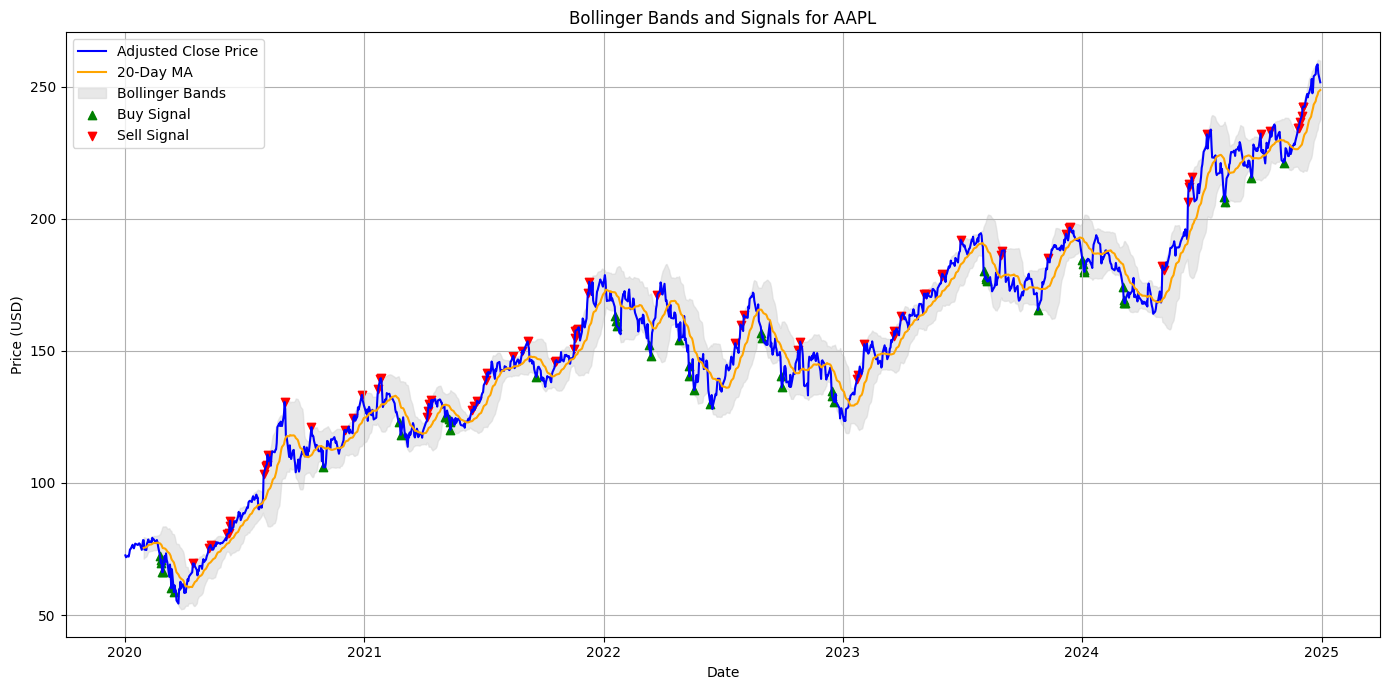

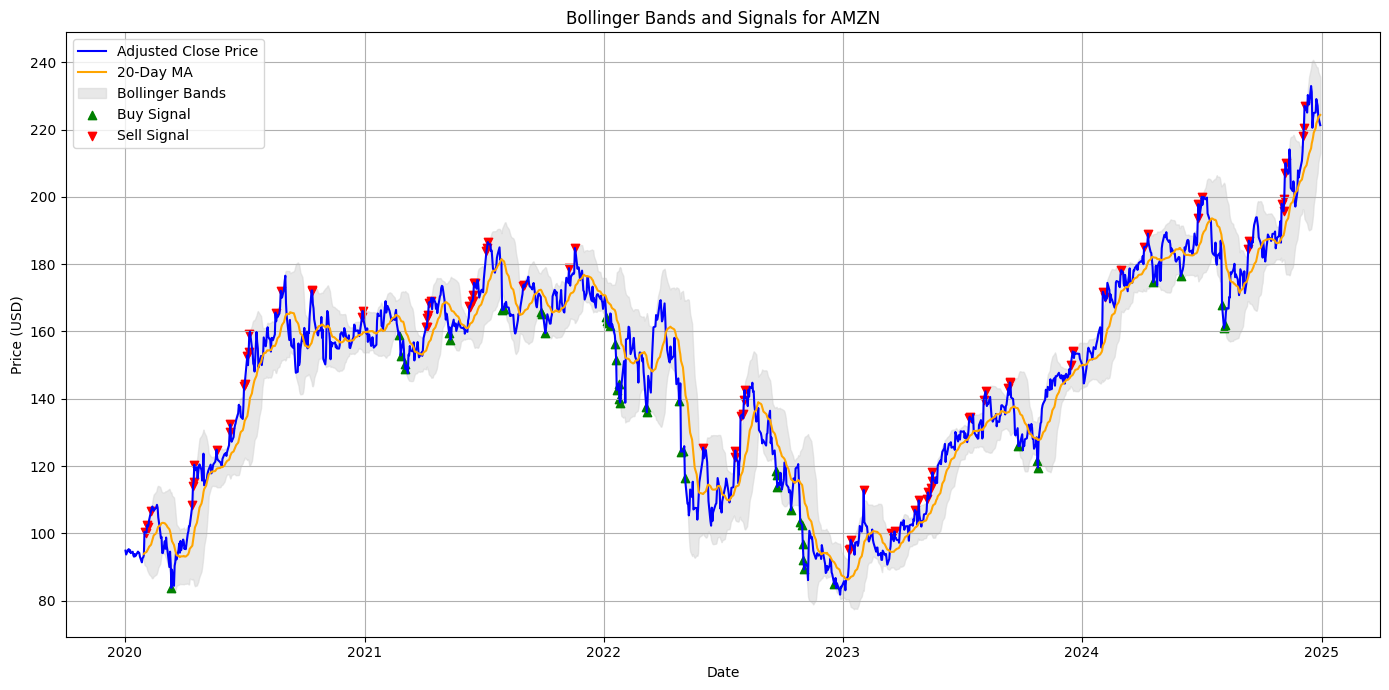

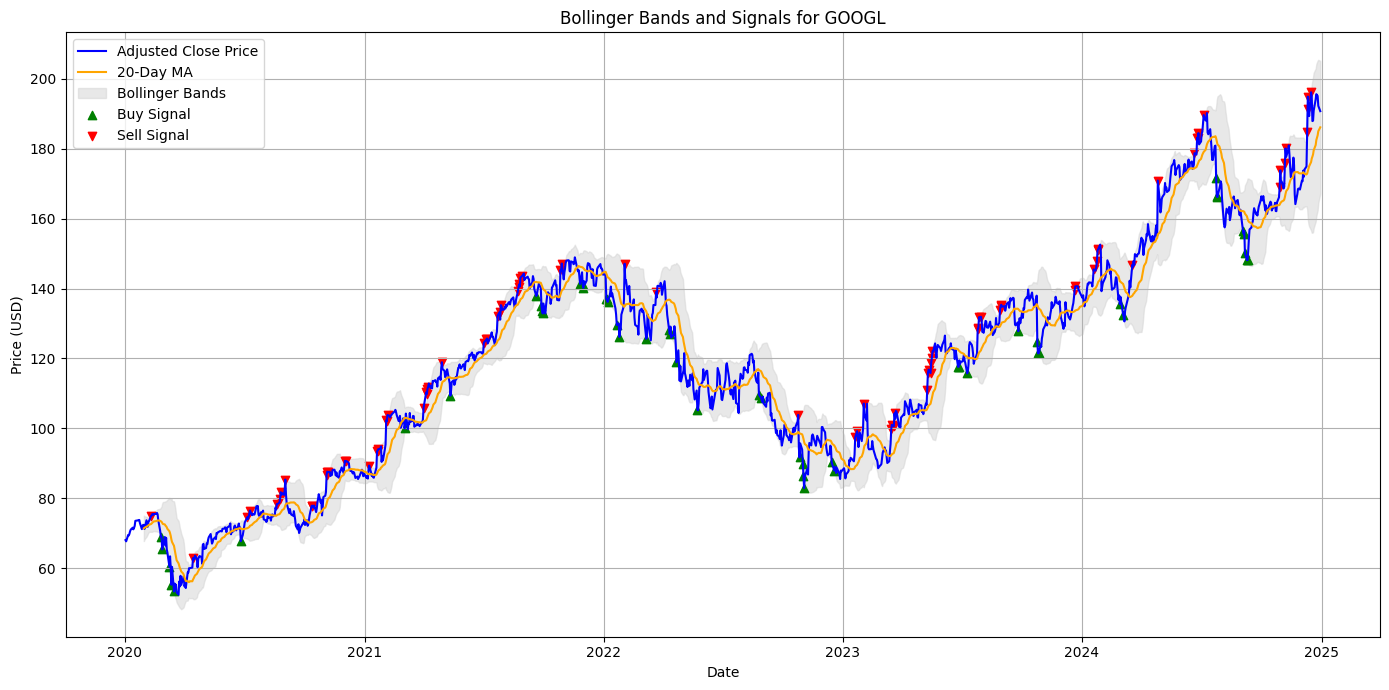

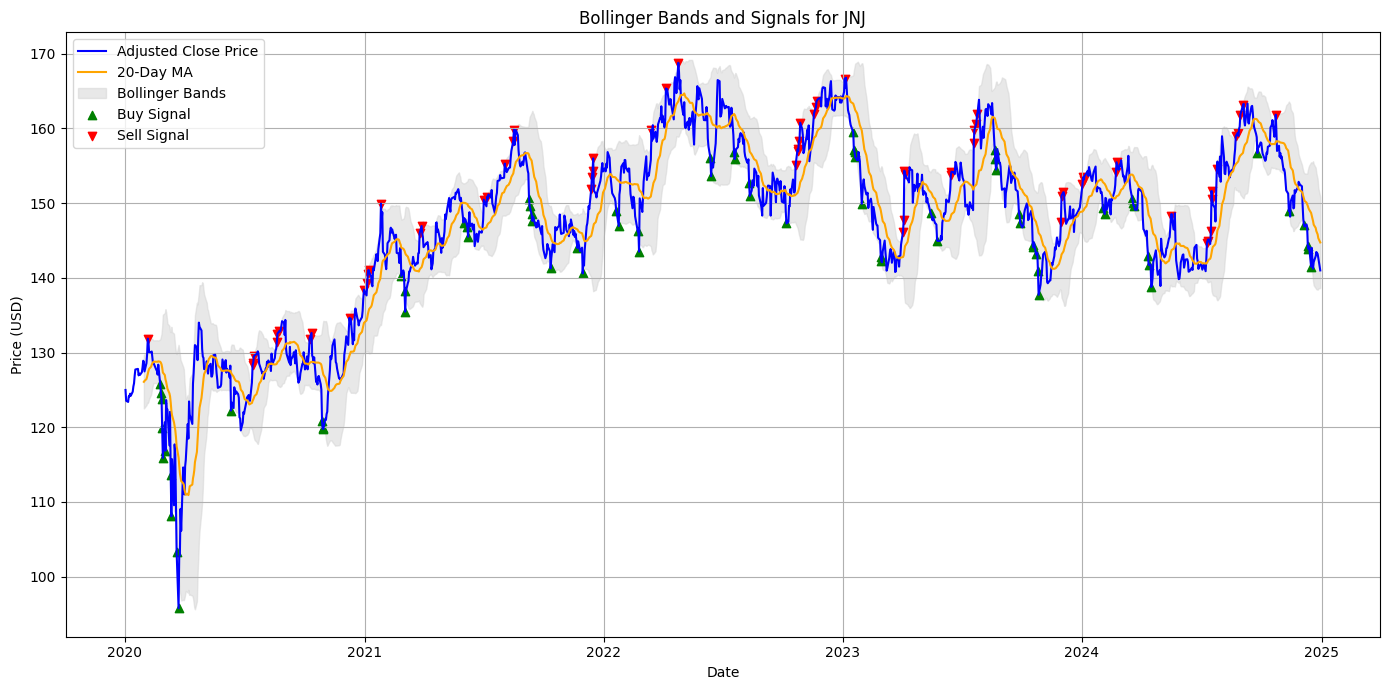

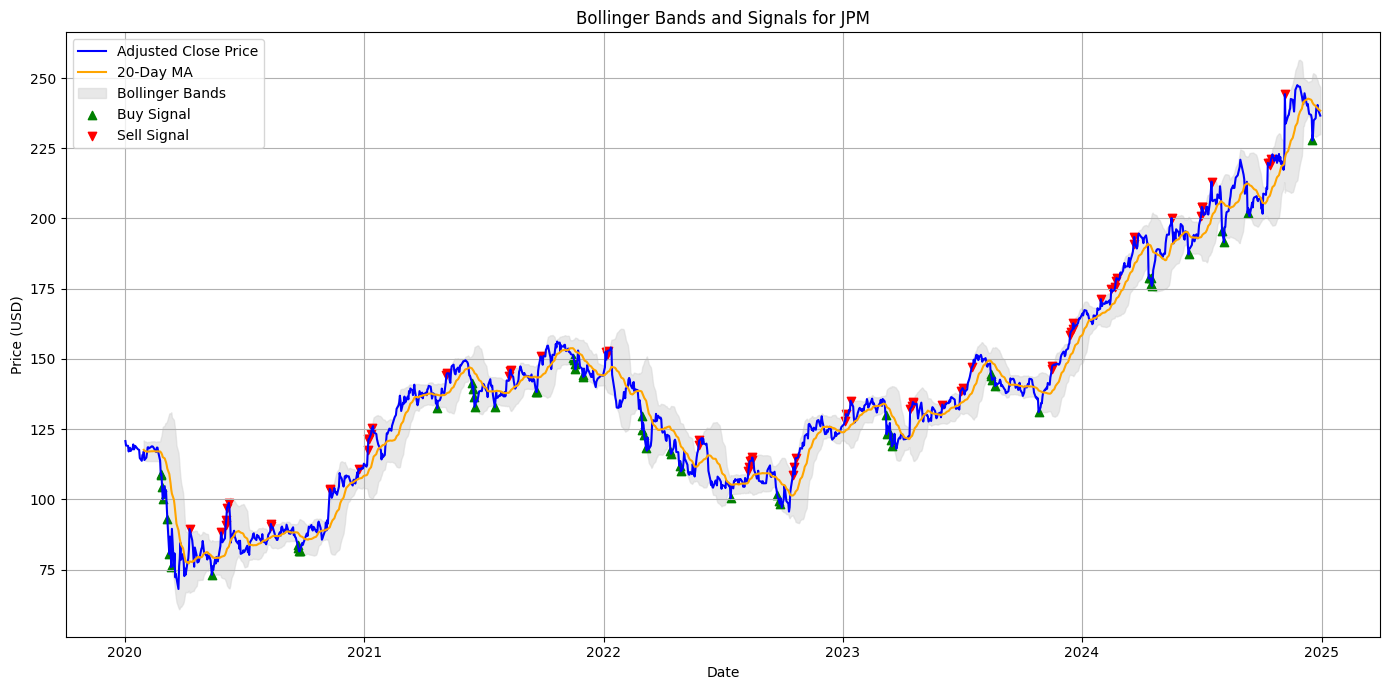

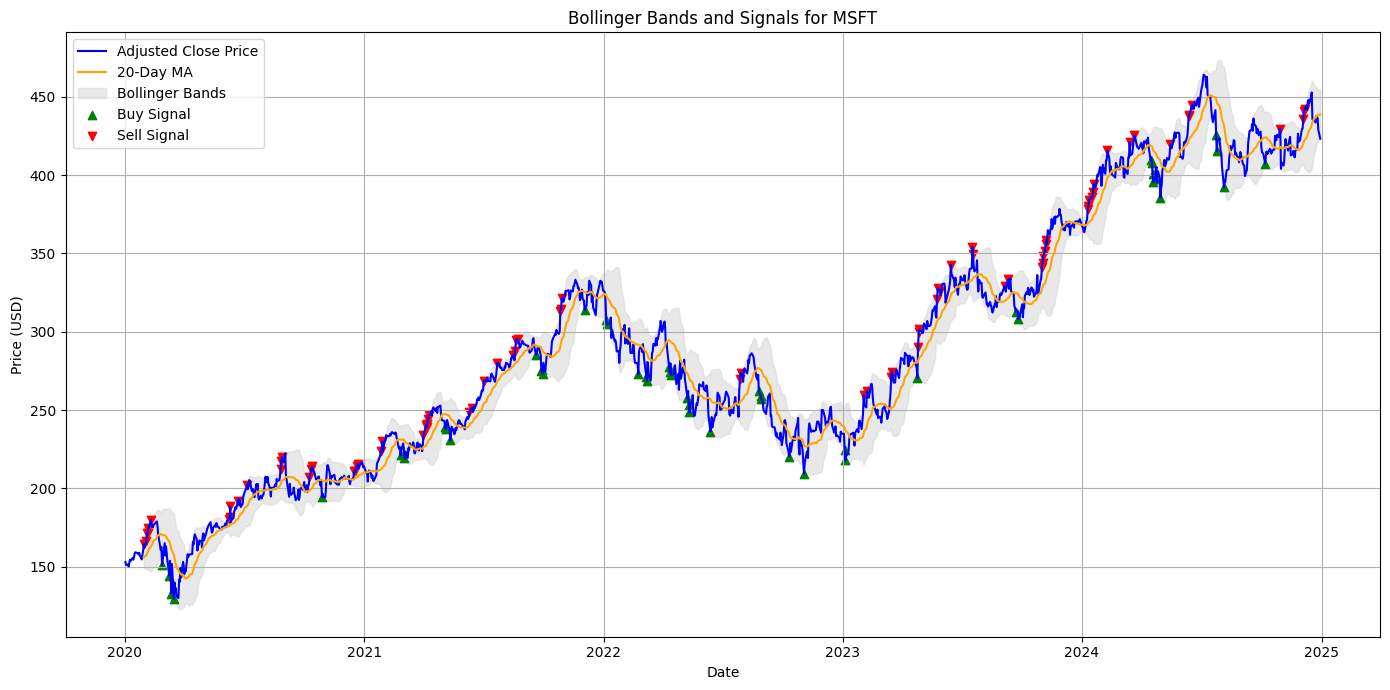

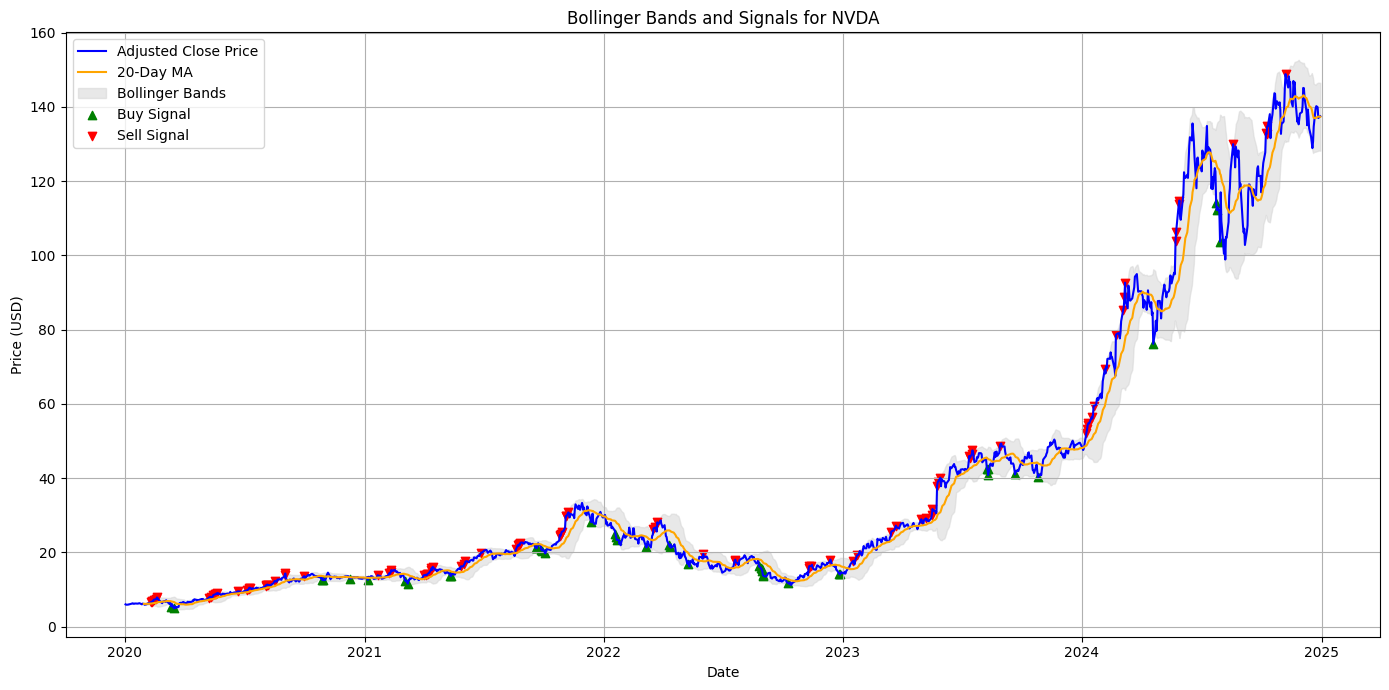

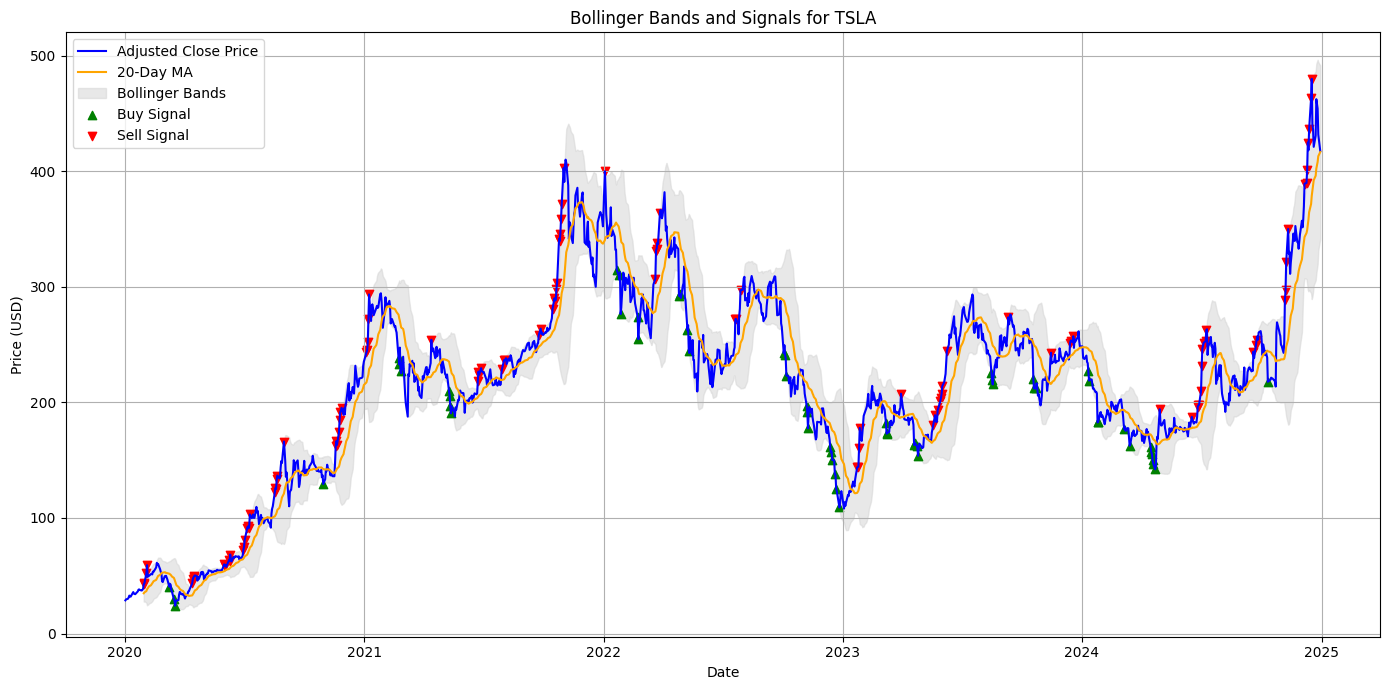

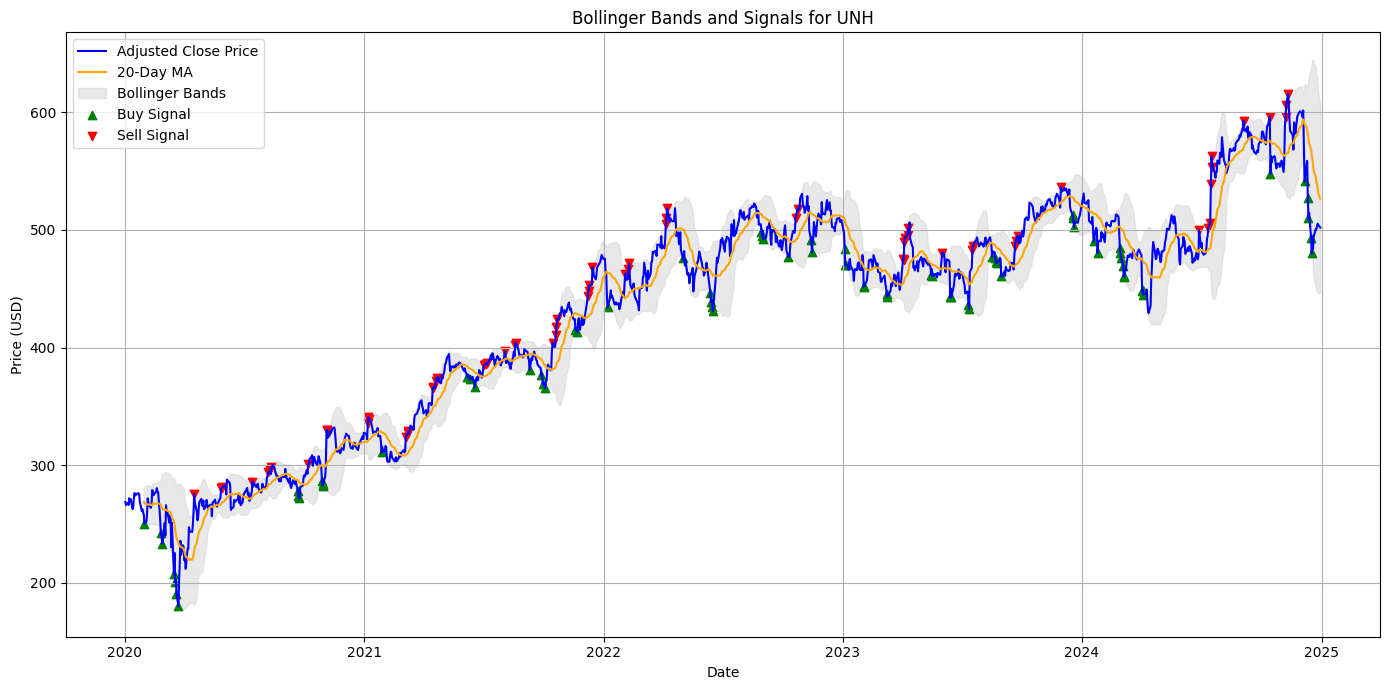

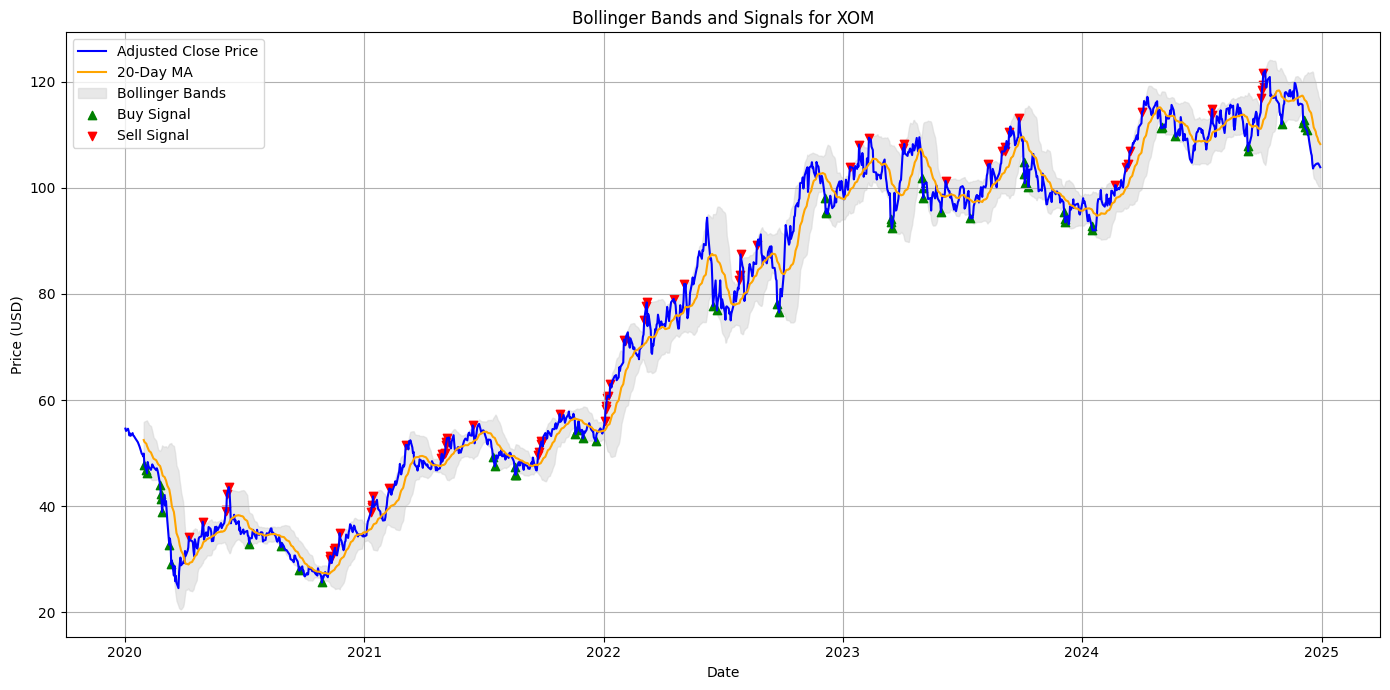

In [ ]:
# Plot Bollinger Bands and signals for each ticker
for ticker in adj_close.columns:
    price = adj_close[ticker]
    ma20 = price.rolling(window).mean()
    std20 = price.rolling(window).std()
    upper_band = ma20 + 2 * std20
    lower_band = ma20 - 2 * std20

    plt.figure(figsize=(14, 7))
    plt.plot(price, label='Adjusted Close Price', color='blue')
    plt.plot(ma20, label='20-Day MA', color='orange')
    plt.fill_between(price.index, upper_band, lower_band, color='lightgray', alpha=0.5, label='Bollinger Bands')
    
    buy_signal = ((price < lower_band) & lower_band.notna())
    sell_signal = ((price > upper_band) & upper_band.notna())
    
    plt.scatter(price.index[buy_signal], price[buy_signal], marker='^', color='green', label='Buy Signal', alpha=1)
    plt.scatter(price.index[sell_signal], price[sell_signal], marker='v', color='red', label='Sell Signal', alpha=1)
    
    plt.title(f'Bollinger Bands and Signals for {ticker}')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


#### Cumulative Returns Summary and Best Strategy Identification

- We first convert the `cumulative_summary` dictionary into a DataFrame for easier visualization and comparison across tickers and strategies.
- The `.T` transposes the DataFrame so that each ticker becomes a row and each strategy becomes a column.
- Using the `.idxmax(axis=1)` method, we identify the best-performing strategy for each ticker based on the highest cumulative return.
- Finally, we display a clean DataFrame `best_strategies_df` that lists the optimal strategy per ticker without printing directly.

In [ ]:
# Convert to DataFrame
cumulative_df = pd.DataFrame(cumulative_summary).T
display(cumulative_df)

# Display the best strategy for each ticker without using a print statement 
best_strategies = cumulative_df.idxmax(axis=1)
best_strategies_df = pd.DataFrame(best_strategies, columns=['Best Strategy'])
display(best_strategies_df)

,Strategy Return,Buy & Hold Return
AAPL,-0.329114,2.464475
AMZN,0.038804,1.331916
GOOGL,-0.200570,1.804648
JNJ,0.071505,0.128091
JPM,0.096260,0.959959
MSFT,0.309579,1.765268
NVDA,-0.582039,22.019697
TSLA,-0.939825,13.552015
UNH,1.836886,0.868456
XOM,-0.011953,0.901092


,Best Strategy
AAPL,Buy & Hold Return
AMZN,Buy & Hold Return
GOOGL,Buy & Hold Return
JNJ,Buy & Hold Return
JPM,Buy & Hold Return
MSFT,Buy & Hold Return
NVDA,Buy & Hold Return
TSLA,Buy & Hold Return
UNH,Strategy Return
XOM,Buy & Hold Return


The analysis reveals that for most stocks, the buy-and-hold strategy yielded higher returns compared to the specific strategies applied.  Notably, NVDA and TSLA showed substantial buy-and-hold returns, despite negative strategy returns.  UNH was an exception where the applied strategy outperformed the buy-and-hold approach. 

#### Strategy vs Buy & Hold: Cumulative Return Comparison

To evaluate the performance of the Bollinger Bands mean reversion strategy relative to a passive investment approach, we visualise the cumulative returns for each of the ten stocks over the five-year period (2020–2024).

For each stock, two return trajectories are plotted:
- **Strategy Returns**: Based on the position-taking logic derived from Bollinger Band signals.
- **Buy & Hold Returns**: Represents the growth of a passive investment held throughout the period.

These plots allow for a visual comparison of whether active signal-based trading leads to superior or inferior returns compared to simply holding the stock. The cumulative returns reflect the value of a $1 initial investment compounded daily.

Following the individual plots, a bar chart summarises the total cumulative returns for both strategies across all tickers. This summary helps highlight which stocks benefit most from the mean reversion strategy and where a passive approach may be more effective.



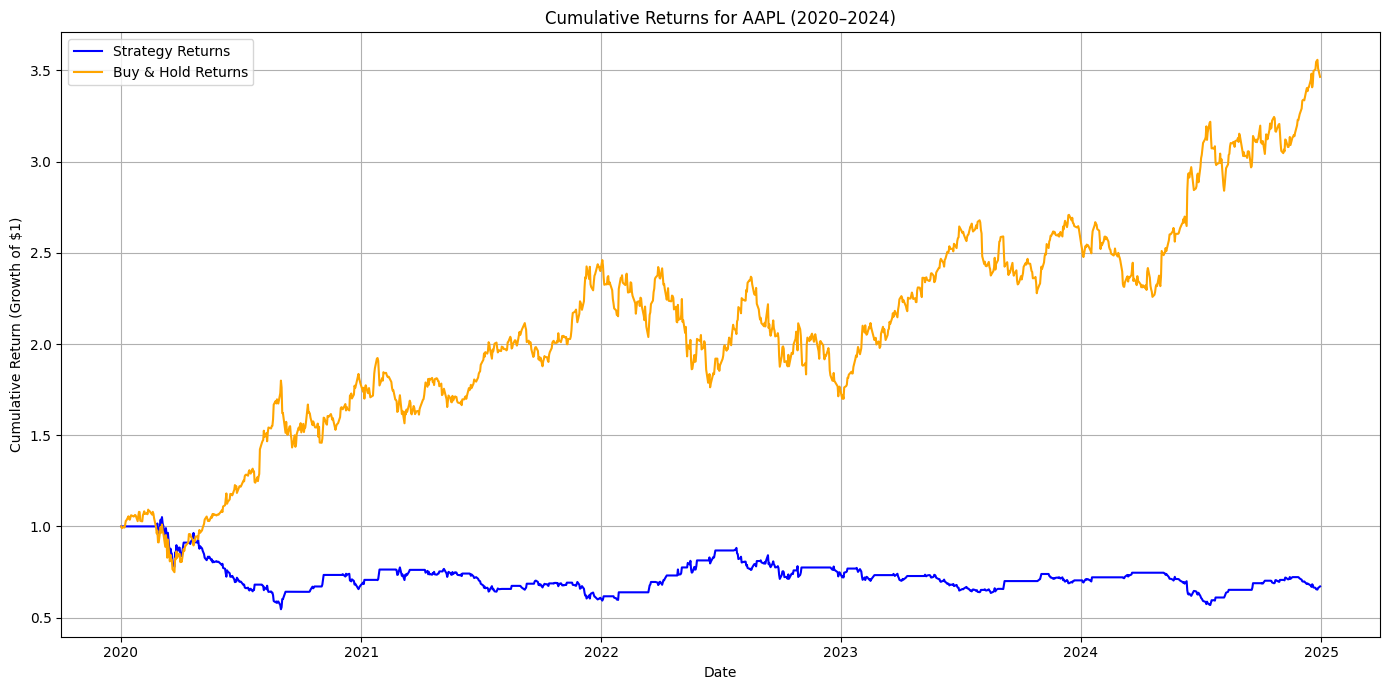

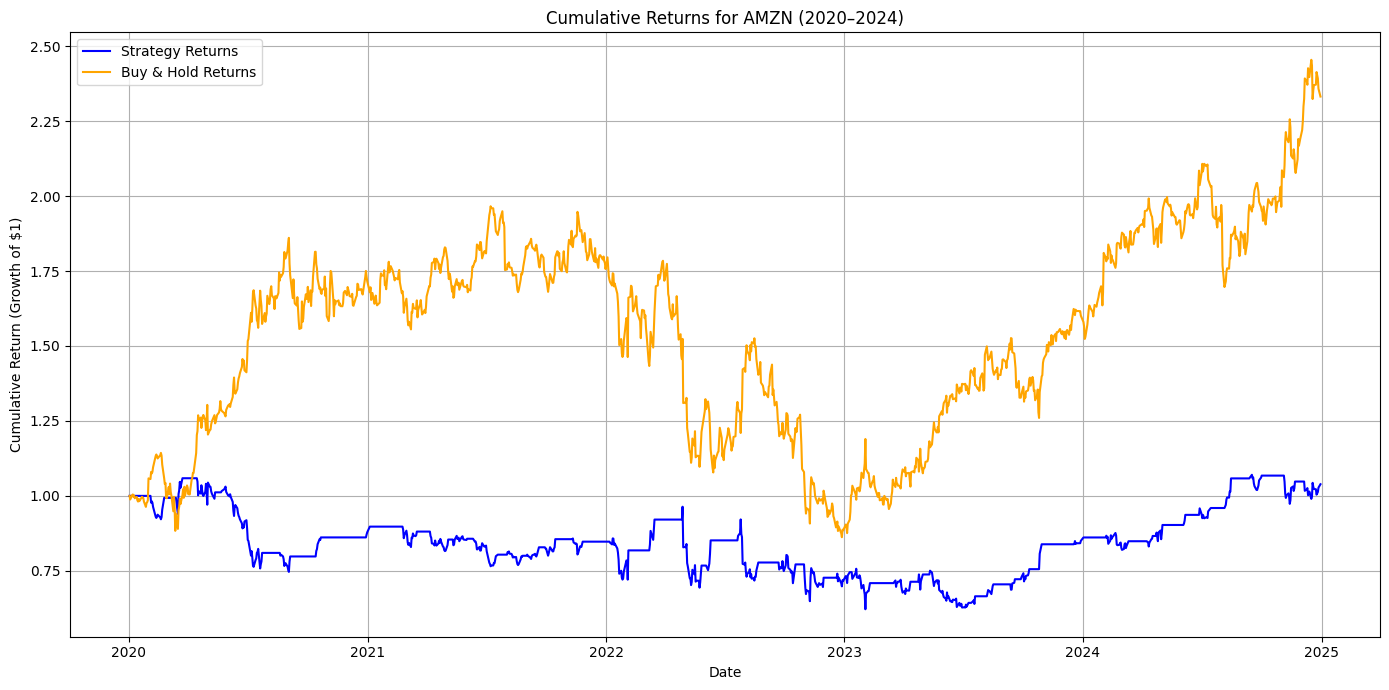

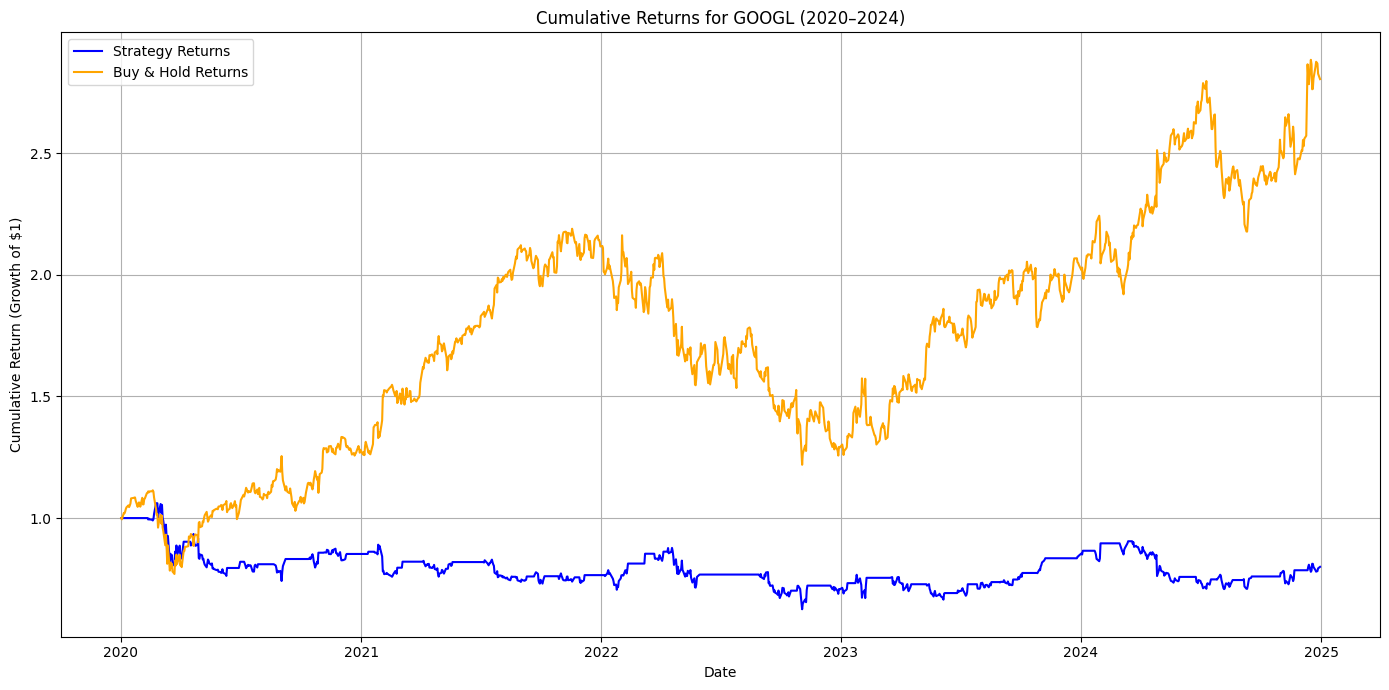

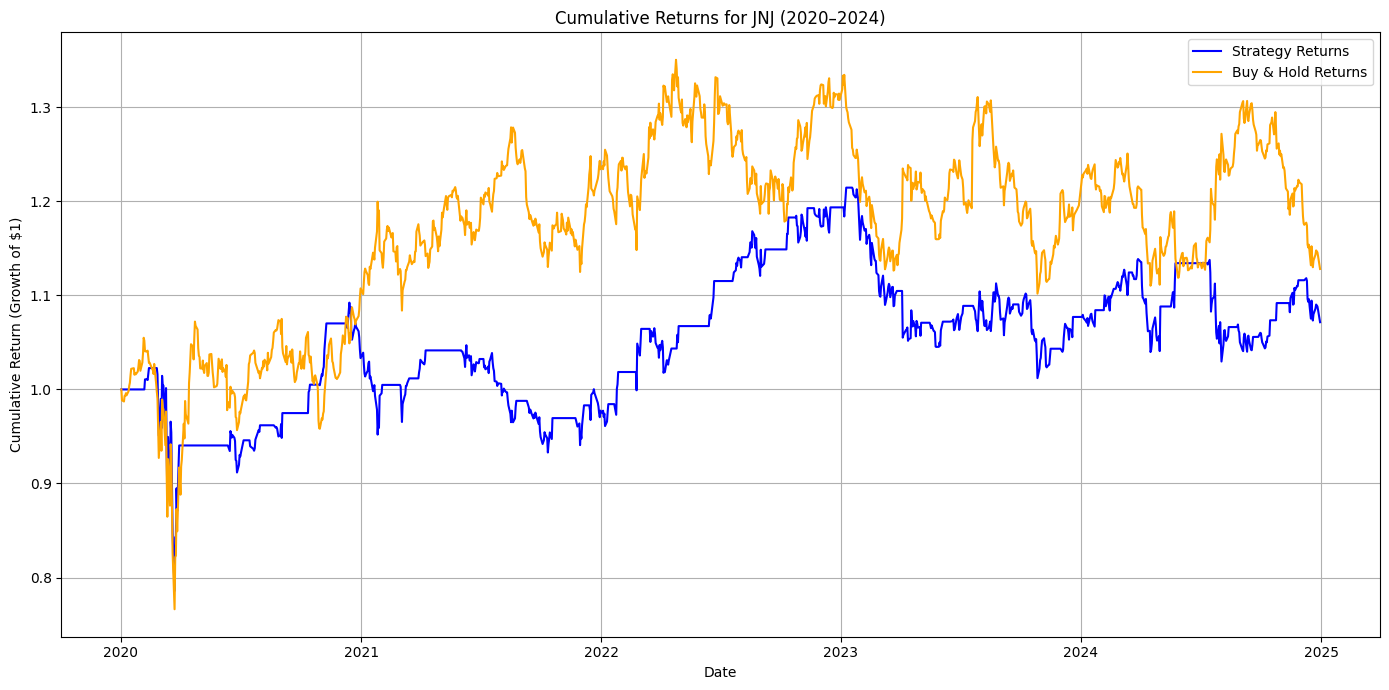

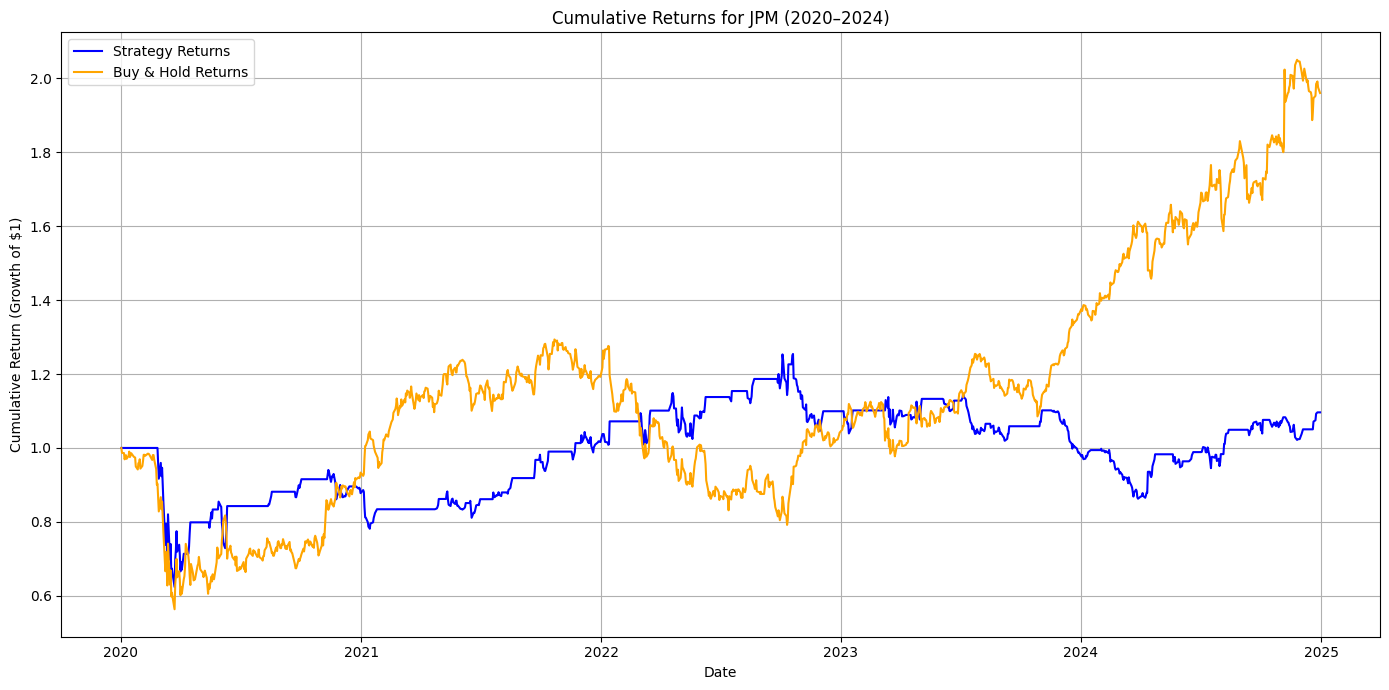

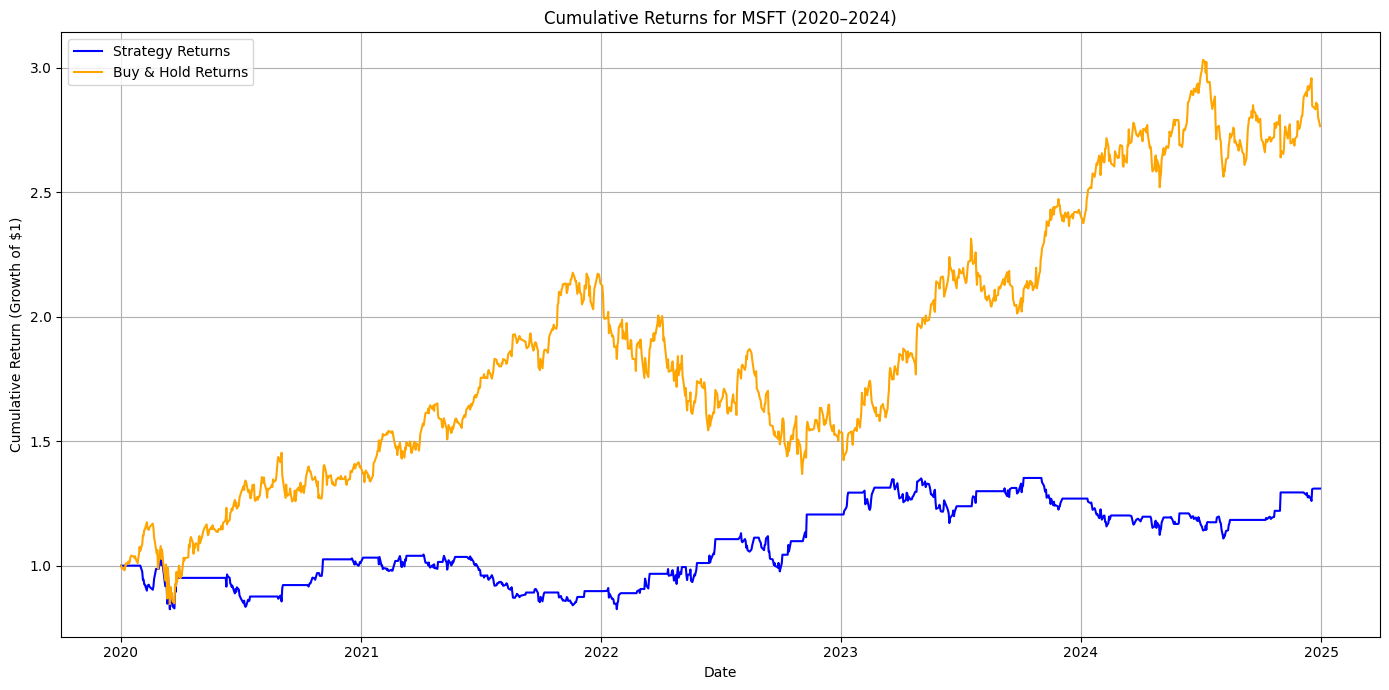

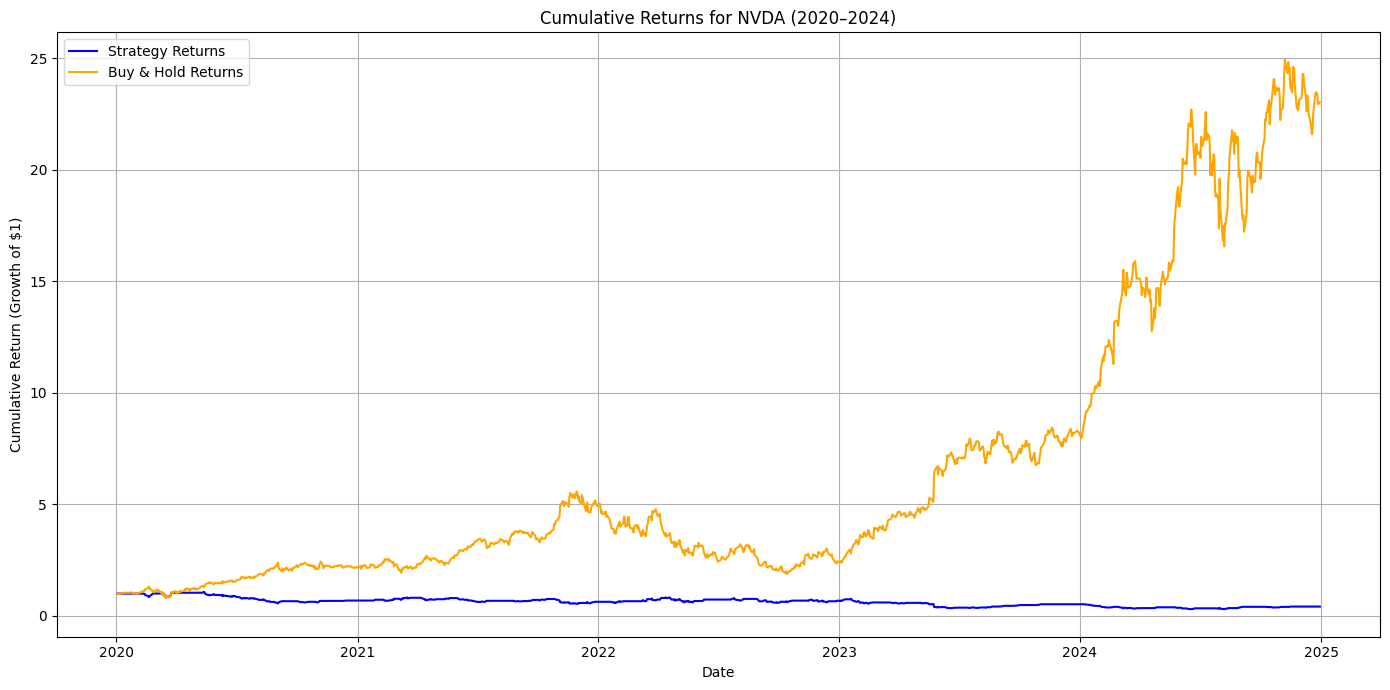

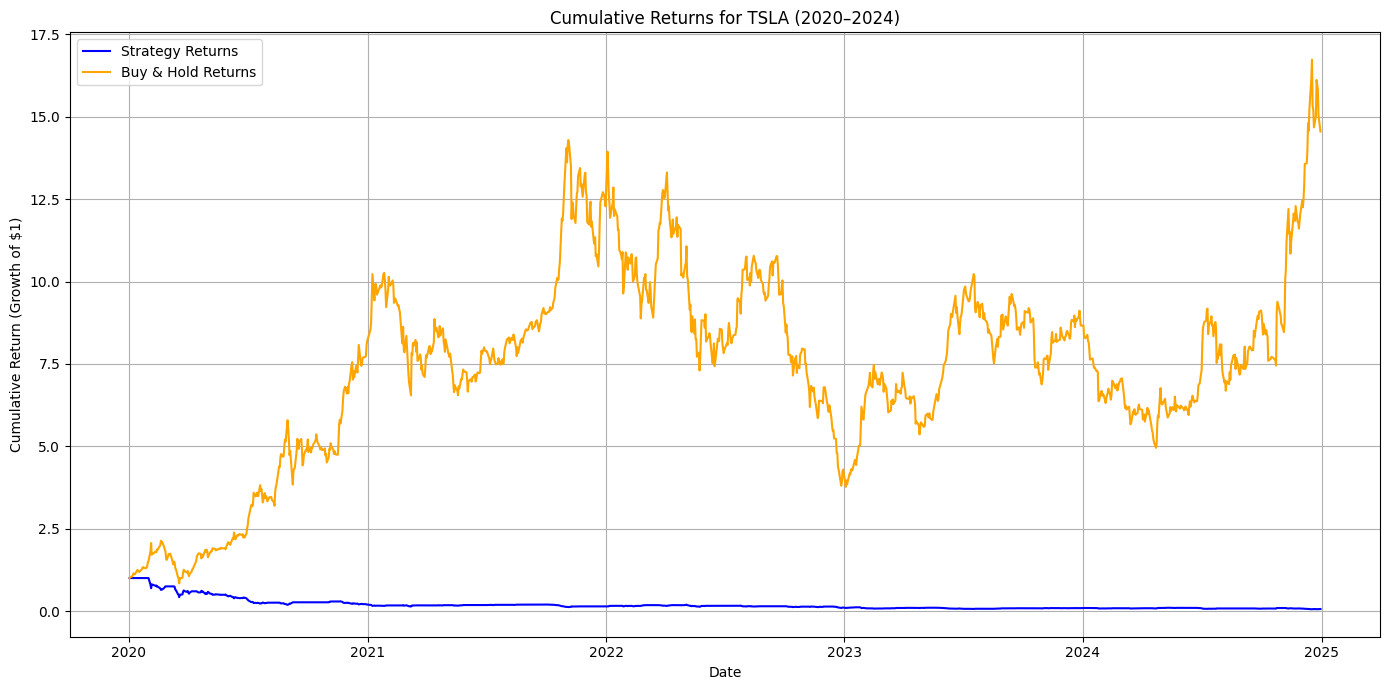

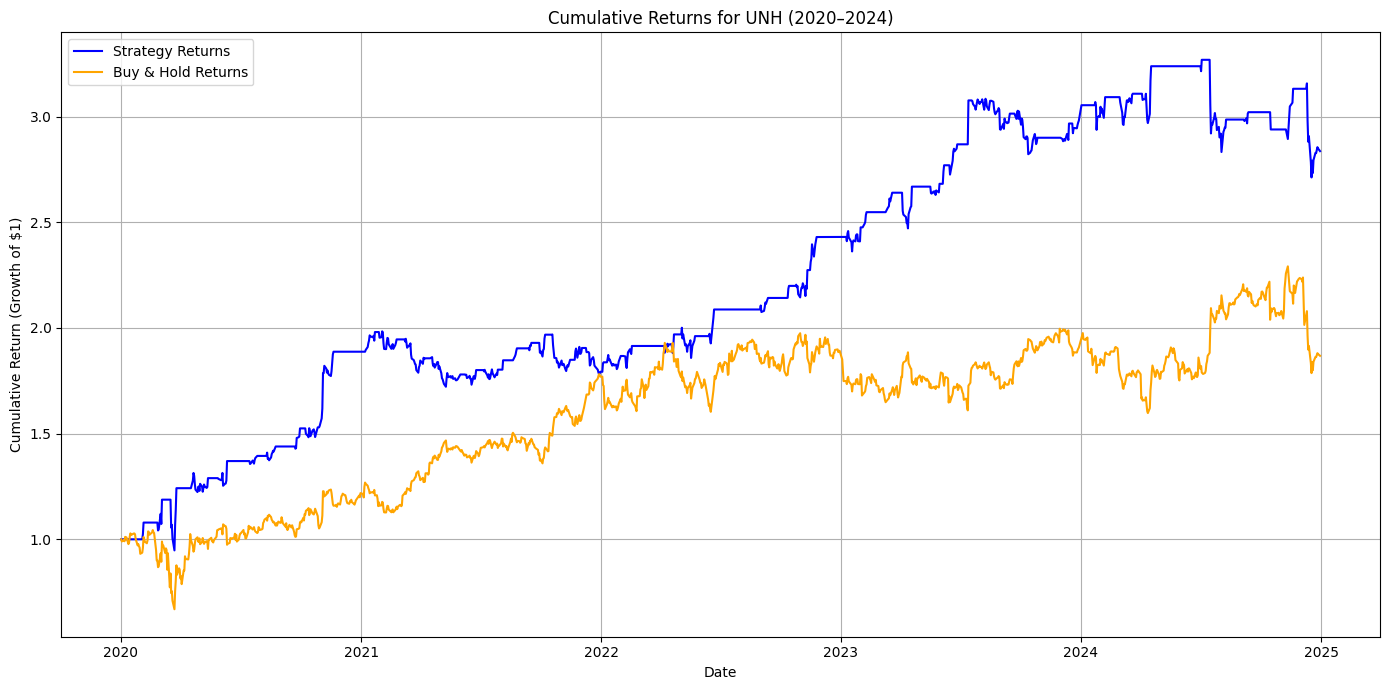

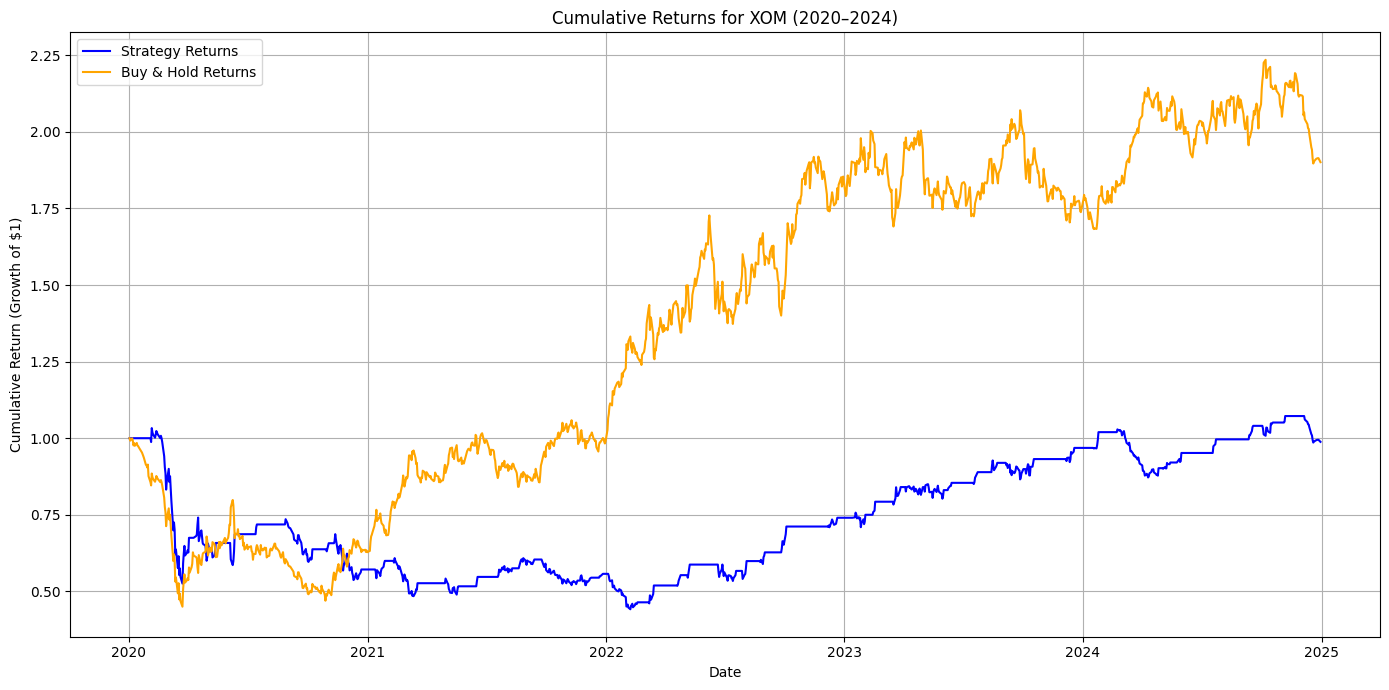

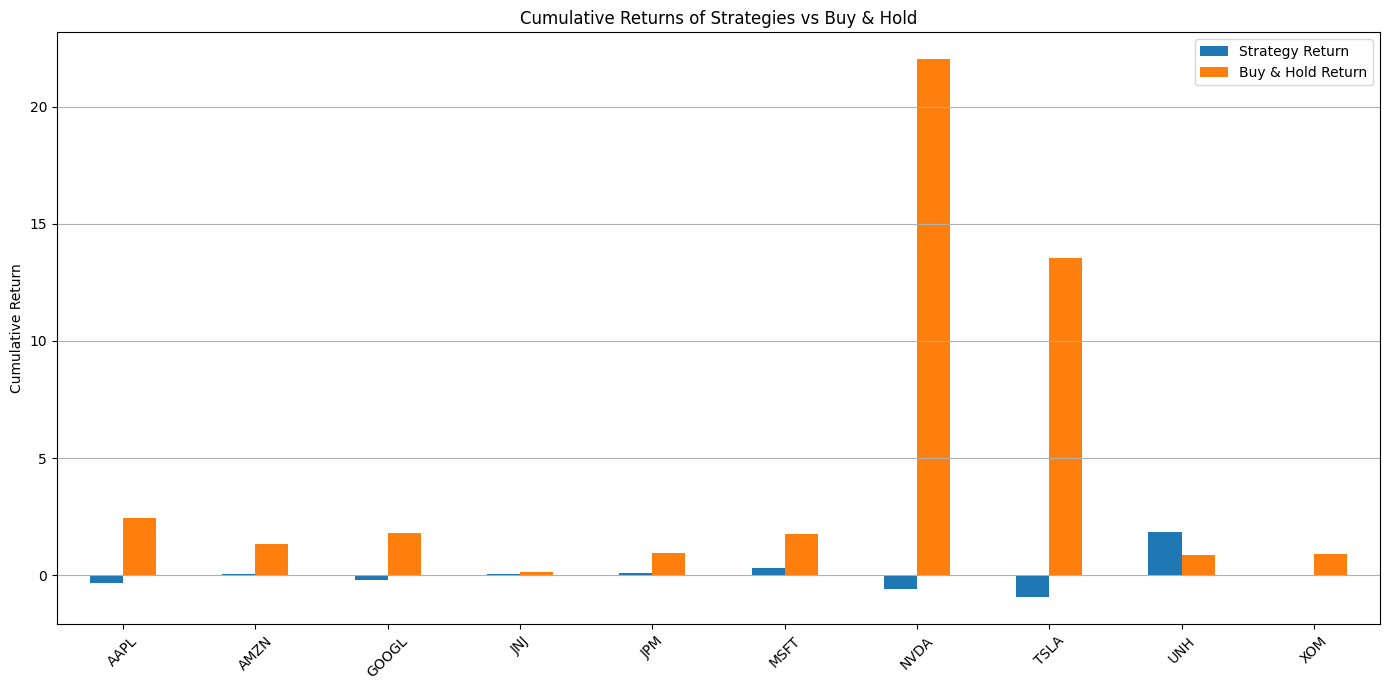

In [ ]:
# Plot cumulative returns for each ticker: Strategy vs Buy & Hold

for ticker in adj_close.columns:
    plt.figure(figsize=(14, 7))
    cumulative_strategy = (1 + strategy_returns[ticker].fillna(0)).cumprod()
    cumulative_hold = (1 + buy_hold_returns[ticker].fillna(0)).cumprod()

    plt.plot(adj_close.index, cumulative_strategy, label='Strategy Returns', color='blue')
    plt.plot(adj_close.index, cumulative_hold, label='Buy & Hold Returns', color='orange')

    plt.title(f'Cumulative Returns for {ticker} (2020–2024)')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Return (Growth of $1)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# plot a bar chart for all ticke cumulative returns in one figure
cumulative_df.plot(kind='bar', figsize=(14, 7), title='Cumulative Returns of Strategies vs Buy & Hold')
plt.ylabel('Cumulative Return')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
    

## Portfolio Management and Risk Visualization


### Equal-Weighted Portfolio Construction and Risk Assessment

In this section, we construct a simple equal-weighted portfolio consisting of the ten selected stocks. Each stock is assigned an identical weight (10%), reflecting a neutral investment stance without preference for any individual asset.

To assess portfolio-level behavior, we first calculate the **simple daily returns** for each stock and derive the **correlation matrix**. This heatmap provides insight into the degree of co-movement across assets, which is essential for understanding diversification effects.

Using the equal weights, we compute the **daily portfolio returns** by taking the dot product of individual stock returns and the weight vector. We then calculate the **cumulative portfolio returns** over time to track the overall portfolio growth.

Additionally, we measure **daily portfolio volatility** using the standard deviation of the portfolio's return series. This metric serves as a proxy for portfolio risk.

Finally, we visualise the cumulative return profile of the equal-weighted portfolio over the 2020–2024 period. This plot provides a baseline for evaluating future optimisation strategies such as Sharpe Ratio maximisation or AI-driven allocations.

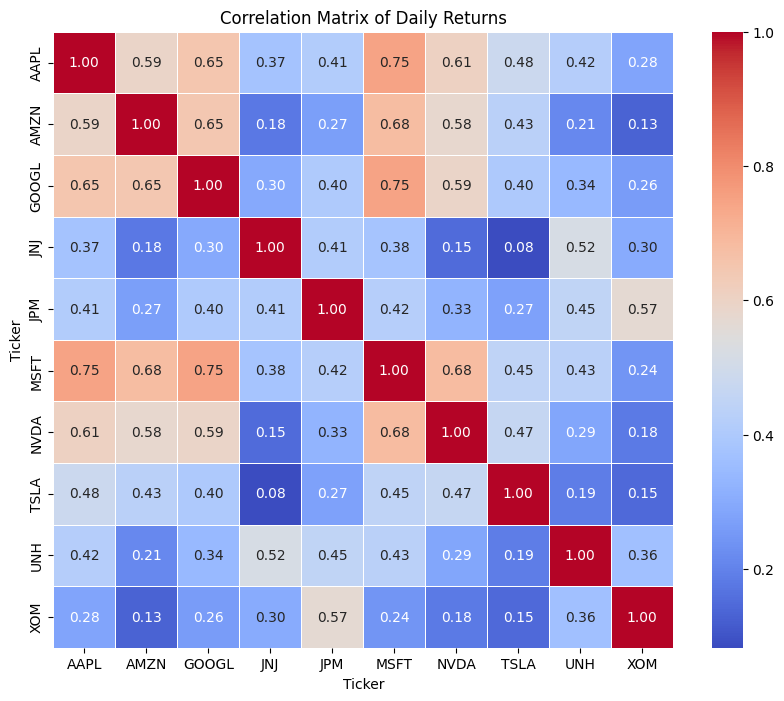

Daily Portfolio Volatility (Std Dev): 0.0159


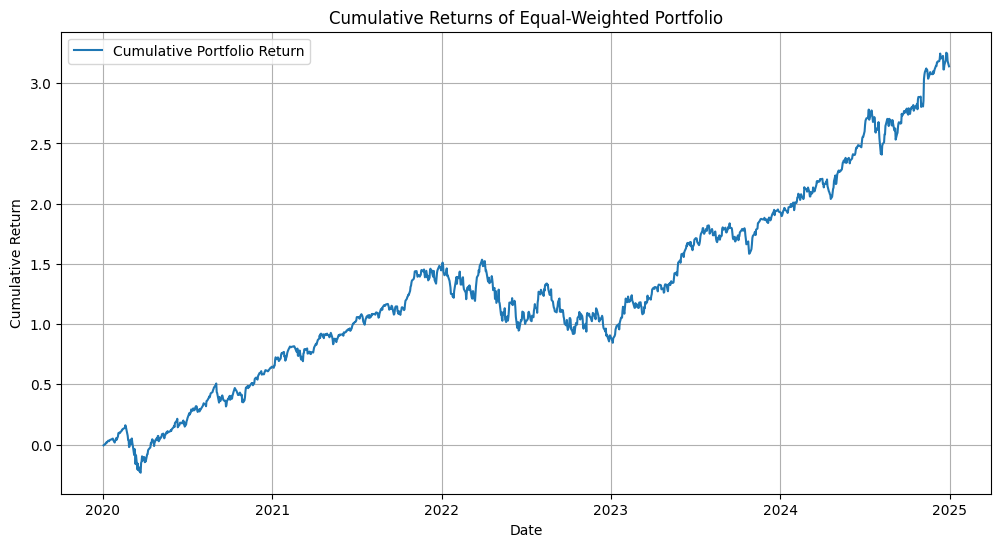

In [ ]:
# Calculate simple daily returns
daily_returns = adj_close.pct_change().dropna()

# Visualize the correlation matrix of daily returns
plt.figure(figsize=(10,8))
sns.heatmap(daily_returns.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Daily Returns")
plt.show()

# Create equal-weighted portfolio weights
num_stocks = len(adj_close.columns)
weights = np.array([1/num_stocks] * num_stocks)

# Calculate portfolio daily returns
portfolio_returns = daily_returns.dot(weights)

# Calculate cumulative returns of the portfolio
cumulative_portfolio_returns = (1 + portfolio_returns).cumprod() - 1

# Calculate daily portfolio volatility (standard deviation)
portfolio_volatility = portfolio_returns.std()

print(f"Daily Portfolio Volatility (Std Dev): {portfolio_volatility:.4f}")

# Plot cumulative portfolio returns
plt.figure(figsize=(12,6))
plt.plot(cumulative_portfolio_returns, label='Cumulative Portfolio Return')
plt.title("Cumulative Returns of Equal-Weighted Portfolio")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True)
plt.show()

## Portfolio Optimisation and Comparative Performance Analysis

### Sharpe Ratio Calculation: Risk-Adjusted Portfolio Performance

To assess the effectiveness of the equal-weighted portfolio on a risk-adjusted basis, we calculate the **Sharpe Ratio**, a standard measure of portfolio performance that considers both return and volatility.

The steps include:
- **Annualised Return**: Calculated by multiplying the average daily portfolio return by the number of trading days in a year (252).
- **Annualised Volatility**: Computed by multiplying the standard deviation of daily returns by the square root of 252.
- **Sharpe Ratio**: Defined as the excess return over the risk-free rate, divided by portfolio volatility:

$$ \text{Sharpe Ratio} = \frac{R_p - R_f}{\sigma_p} $$
For this analysis, we assume an annual risk-free rate of **4.38%** based on recent U.S. Treasury yields.

A higher Sharpe Ratio indicates more return per unit of risk taken, making it a central criterion in portfolio optimisation. This measure enables a fair comparison between different investment strategies, regardless of their absolute return levels.


In [ ]:
TRADING_DAYS = 252
RFR = 0.0438

# Simple annualized return (for consistency with Sharpe ratio optimisation)
annualized_returns = portfolio_returns.mean() * TRADING_DAYS
annualized_volatility = portfolio_returns.std() * np.sqrt(TRADING_DAYS)

sharpe_ratio = (annualized_returns - RFR) / annualized_volatility

print(f"Annualized Portfolio Return: {annualized_returns:.4f}")
print(f"Annualized Portfolio Volatility: {annualized_volatility:.4f}")
print(f"Sharpe Ratio: {sharpe_ratio:.4f}")

Annualized Portfolio Return: 0.3170
Annualized Portfolio Volatility: 0.2517
Sharpe Ratio: 1.0856


### Portfolio Optimisation: 

To enhance portfolio performance beyond the baseline equal-weighted strategy, we implement three distinct optimisation approaches:

#### 1. **Sharpe Ratio Maximisation**

This classical optimisation technique seeks to determine the asset weightings that maximise the portfolio's **Sharpe Ratio**—a measure of risk-adjusted return. The optimisation is performed under typical constraints:
- Weights must sum to 1 (fully invested)
- Weights must lie between 0 and 1 (long-only portfolio)

The resulting optimised weights are applied to the historical return series to calculate the **cumulative returns of the Sharpe-optimal portfolio**.


In [ ]:
from scipy.optimize import minimize

# Calculate daily returns
returns = adj_close.pct_change().dropna()
mean_returns = returns.mean()
cov_matrix = returns.cov()
TRADING_DAYS = 252
risk_free_rate = 0.0438 / TRADING_DAYS  # daily RFR

# Define Sharpe Ratio optimisation
def negative_sharpe(weights, mean_returns, cov_matrix, risk_free_rate):
    port_return = np.dot(weights, mean_returns) * TRADING_DAYS
    port_vol = np.sqrt(np.dot(weights.T, np.dot(cov_matrix * TRADING_DAYS, weights)))
    return -((port_return - 0.0438) / port_vol)  # annualised Sharpe

constraints = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}
bounds = tuple((0, 1) for _ in tickers)
initial_guess = np.array([1.0 / len(tickers)] * len(tickers))

result = minimize(negative_sharpe, initial_guess,
                  args=(mean_returns, cov_matrix, risk_free_rate),
                  method='SLSQP', bounds=bounds, constraints=constraints)

# Output
Sharpe_ratio_optimal_weights = result.x
portfolio_return = np.dot(Sharpe_ratio_optimal_weights, mean_returns) * TRADING_DAYS
portfolio_volatility = np.sqrt(np.dot(Sharpe_ratio_optimal_weights.T, np.dot(cov_matrix * TRADING_DAYS, Sharpe_ratio_optimal_weights)))
sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility

# calcuate the cumulative returns of the optimal portfolio
optimal_portfolio_returns = returns.dot(Sharpe_ratio_optimal_weights)
sp_cumulative_optimal_portfolio_returns = (1 + optimal_portfolio_returns).cumprod() - 1

# Print optimal weights
print("Optimal Weights:")
for ticker, weight in zip(tickers, Sharpe_ratio_optimal_weights):
    print(f"{ticker}: {weight:.2%}")
print(f"\nAnnualised Return: {portfolio_return:.2%}")
print(f"Annualised Volatility: {portfolio_volatility:.2%}")
print(f"Sharpe Ratio: {sharpe_ratio:.4f}")


Optimal Weights:
AAPL: 0.00%
MSFT: 0.00%
GOOGL: 0.00%
AMZN: 0.00%
TSLA: 0.00%
JNJ: 0.00%
NVDA: 61.65%
XOM: 25.28%
JPM: 0.00%
UNH: 13.07%

Annualised Return: 69.44%
Annualised Volatility: 44.88%
Sharpe Ratio: 1.5468


#### 2. **AI-Generated Portfolio Allocation：Minimising Conditional Value at Risk (CVaR)**

In this section, we optimise the portfolio by minimising the **Conditional Value at Risk (CVaR)**, also known as Expected Shortfall. Unlike the Sharpe Ratio, which focuses on risk-adjusted returns, CVaR directly targets downside risk by estimating the **expected loss in the worst-case scenarios**.

The optimisation process follows these steps:
- **Portfolio Returns**: We calculate the daily returns of each asset and form a weighted portfolio return series.
- **CVaR Objective Function**: Using a confidence level of 95%, the algorithm identifies the average portfolio loss in the worst 5% of cases and seeks to minimise it.
- **Constraints and Bounds**:
  - The weights must sum to 1 (fully invested portfolio).
  - Short selling is not allowed; all weights are constrained between 0 and 1.

Using the `SLSQP` optimisation method, we solve for the asset allocation that results in the lowest possible CVaR. The resulting weight distribution is displayed as a bar chart, providing a clear overview of how the AI-optimised strategy allocates capital across the ten selected stocks.


Optimal Weights (Min CVaR):
AAPL: 0.00%
AMZN: 13.62%
GOOGL: 0.00%
JNJ: 70.62%
JPM: 0.00%
MSFT: 0.00%
NVDA: 0.00%
TSLA: 0.00%
UNH: 7.09%
XOM: 8.67%


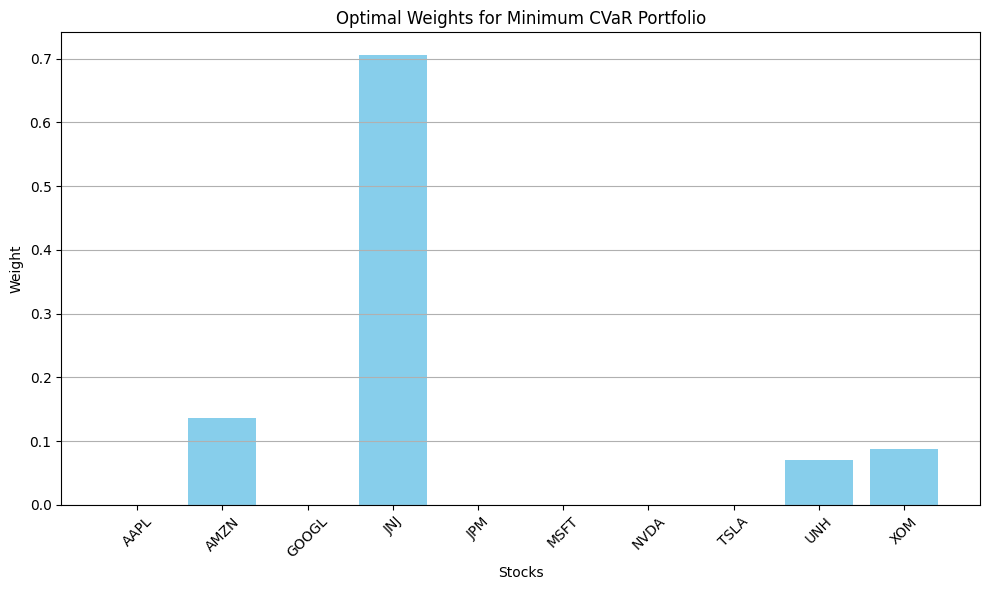

In [ ]:
# Portfolio Optimization using Conditional Value at Risk (CVaR)

from scipy.optimize import minimize

returns = adj_close.pct_change().dropna()

# Input Data
TRADING_DAYS = 252
CONFIDENCE_LEVEL = 0.95
NUM_ASSETS = returns.shape[1]

# Objective Function
def calculate_cvar(weights, returns, alpha=CONFIDENCE_LEVEL):
    """
    Compute the Conditional Value at Risk (CVaR) of a portfolio.
    CVaR estimates the expected loss in the worst (1-alpha)% of cases.
    """
    portfolio_returns = returns.dot(weights)
    var_threshold = np.percentile(portfolio_returns, (1 - alpha) * 100)
    cvar = portfolio_returns[portfolio_returns <= var_threshold].mean()
    return -cvar  # Minimize negative CVaR

# Constraints and Bounds
# Constraints: portfolio weights sum to 1 (full investment)
constraints = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1})

# Bounds: No short selling, so weights between 0 and 1
bounds = tuple((0, 1) for _ in range(NUM_ASSETS))

# Initial guess: equal weights
initial_weights = np.ones(NUM_ASSETS) / NUM_ASSETS

# Optimisation
result = minimize(
    fun=calculate_cvar,
    x0=initial_weights,
    args=(returns,),
    method='SLSQP',
    bounds=bounds,
    constraints=constraints
)

# Output Optimal Weights
AI_optimal_weights = result.x
print("Optimal Weights (Min CVaR):")
for ticker, weight in zip(returns.columns, AI_optimal_weights):
    print(f"{ticker}: {weight:.2%}")

# Calculate the cumulative returns of the optimal portfolio
optimal_portfolio_returns = returns.dot(AI_optimal_weights)
AI_cumulative_optimal_portfolio_returns = (1 + optimal_portfolio_returns).cumprod() - 1


# plot the optimal weights
plt.figure(figsize=(10, 6))
plt.bar(returns.columns, AI_optimal_weights, color='skyblue')
plt.title('Optimal Weights for Minimum CVaR Portfolio')
plt.xlabel('Stocks')
plt.ylabel('Weight')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### 3. **Equal-Weighted Portfolio Performance Metrics**

Here, we quantify the risk-return profile of the equal-weighted portfolio constructed from the ten selected stocks.

- **Portfolio Returns**: Calculated as the weighted sum of daily returns, where each asset is equally weighted (i.e., 10% each).
- **Cumulative Returns**: Computed by compounding daily returns to illustrate growth over the entire period.
- **Annualised Return and Volatility**: The mean daily return and standard deviation are annualised assuming 252 trading days per year.
- **Sharpe Ratio**: The risk-adjusted return metric, calculated by subtracting the risk-free rate (4.38%) from the annualised return, then dividing by annualised volatility.

In [ ]:
TRADING_DAYS = 252
RFR = 0.0438

# Number of assets
num_assets = len(daily_returns.columns)

# Equal weights
equal_weights = np.ones(num_assets) / num_assets

# Calculate portfolio returns using dot product
equal_weighted_returns = daily_returns.dot(equal_weights)

# Calculate cumulative returns
equal_cumulative_returns = (1 + equal_weighted_returns.fillna(0)).cumprod() - 1

# Annualised return and volatility
TRADING_DAYS = 252
annual_return_eq = equal_weighted_returns.mean() * TRADING_DAYS
annual_volatility_eq = equal_weighted_returns.std() * np.sqrt(TRADING_DAYS)
sharpe_eq = (annual_return_eq - RFR) / annual_volatility_eq

# calculate the cumulative returns of the equal-weighted portfolio
equal_cumulative_returns = (1 + equal_weighted_returns.fillna(0)).cumprod() - 1

# Display results
print(f"Annualised Return (Equal Weighted): {annual_return_eq:.4f}")
print(f"Annualised Volatility (Equal Weighted): {annual_volatility_eq:.4f}")
print(f"Sharpe Ratio (Equal Weighted): {sharpe_eq:.4f}")


Annualised Return (Equal Weighted): 0.3170
Annualised Volatility (Equal Weighted): 0.2517
Sharpe Ratio (Equal Weighted): 1.0856


### Comparative Analysis

We will visually compare the **cumulative returns** of these three portfolios by plotting their performance over time. This comparison helps us understand the effectiveness of optimisation methods against a simple equal-weighted benchmark, highlighting potential improvements in return and risk-adjusted performance.

By analysing these results, we gain insights into the practical impact of advanced optimisation techniques on portfolio growth and volatility.

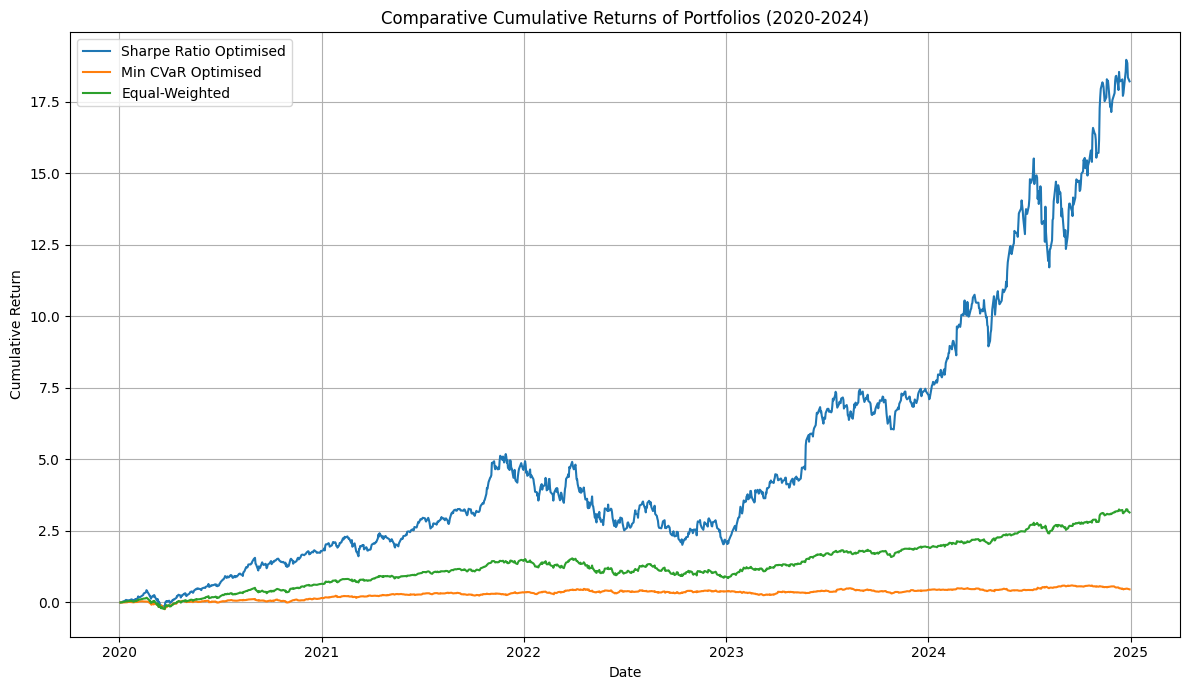

In [ ]:

TRADING_DAYS = 252
RFR = 0.0438  # Annual risk-free rate

# 1. Sharpe Ratio Optimised Portfolio
mean_returns = daily_returns.mean()
cov_matrix = daily_returns.cov()
num_assets = len(mean_returns)

def negative_sharpe(weights, mean_returns, cov_matrix, risk_free_rate):
    port_return = np.dot(weights, mean_returns) * TRADING_DAYS
    port_vol = np.sqrt(np.dot(weights.T, np.dot(cov_matrix * TRADING_DAYS, weights)))
    return -((port_return - 0.0438) / port_vol)

constraints = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}
bounds = tuple((0,1) for _ in range(num_assets))
initial_guess = np.ones(num_assets) / num_assets

result_sharpe = minimize(
    negative_sharpe,
    initial_guess,
    args=(mean_returns, cov_matrix, RFR),
    method='SLSQP',
    bounds=bounds,
    constraints=constraints
)
weights_sharpe = result_sharpe.x

sharpe_returns = daily_returns.dot(weights_sharpe)
cumulative_sharpe = (1 + sharpe_returns.fillna(0)).cumprod() - 1

# 2. Min CVaR Optimised Portfolio

CONFIDENCE_LEVEL = 0.95

def calculate_cvar(weights, returns, alpha=CONFIDENCE_LEVEL):
    portfolio_returns = returns.dot(weights)
    var_threshold = np.percentile(portfolio_returns, (1 - alpha) * 100)
    cvar = portfolio_returns[portfolio_returns <= var_threshold].mean()
    return -cvar  # Negative for minimization

initial_weights = np.ones(num_assets) / num_assets
result_cvar = minimize(
    calculate_cvar,
    initial_weights,
    args=(daily_returns,),
    method='SLSQP',
    bounds=bounds,
    constraints=constraints
)
weights_cvar = result_cvar.x

cvar_returns = daily_returns.dot(weights_cvar)
cumulative_cvar = (1 + cvar_returns.fillna(0)).cumprod() - 1

# 3. Equal-Weighted Portfolio
equal_weights = np.ones(num_assets) / num_assets
equal_returns = daily_returns.dot(equal_weights)
cumulative_equal = (1 + equal_returns.fillna(0)).cumprod() - 1

# Plotting the cumulative returns of all three portfolios
plt.figure(figsize=(12,7))
plt.plot(cumulative_sharpe.index, cumulative_sharpe, label='Sharpe Ratio Optimised')
plt.plot(cumulative_cvar.index, cumulative_cvar, label='Min CVaR Optimised')
plt.plot(cumulative_equal.index, cumulative_equal, label='Equal-Weighted')

plt.title('Comparative Cumulative Returns of Portfolios (2020-2024)')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Portfolio Optimisation and Strategy Report

Based on the comparative analysis of the Sharpe Ratio Optimised, Min CVaR Optimised, and Equal-Weighted portfolios, the Sharpe Ratio Optimised portfolio is recommended. This portfolio demonstrated superior cumulative returns (17.5%) over the period from 2020 to 2024, outperforming both the Min CVaR Optimised and Equal-Weighted strategies. The Sharpe Ratio Optimised approach effectively balances risk and return, making it suitable for investors seeking optimal performance with controlled volatility.

####  **Proposed Optimal Weights (Sharpe Ratio Optimised)**

The following table displays the proposed optimal weights for each stock in the Sharpe Ratio Optimised portfolio:

| Ticker | Optimal Weight |
|--------|----------------|
| AAPL   | 0.00%          |
| MSFT   | 0.00%          |
| GOOGL  | 0.00%          |
| AMZN   | 0.00%          |
| TSLA   | 0.00%          |
| JNJ    | 0.00%          |
| NVDA   | 61.65%         |
| XOM    | 25.28%         |
| JPM    | 0.00%          |
| UNH    | 13.07%         |

These weights reflect a strategic allocation focused on high-potential stocks like NVDA and XOM, while also including a moderate allocation to UNH for diversification.

#### **Stocks Recommended for Trading Based on the Mean Reversion Strategy**


| Ticker | Strategy Return | Buy & Hold Return |
|--------|------------------|-------------------|
| AAPL   | -0.3291          | 2.4645            |
| AMZN   | 0.0388           | 1.3319            |
| GOOGL  | -0.2006          | 1.8046            |
| JNJ    | 0.0715           | 0.1281            |
| JPM    | 0.0963           | 0.9599            |
| MSFT   | 0.3096           | 1.7653            |
| NVDA   | -0.5820          | 22.0197           |
| TSLA   | -0.9398          | 13.5520           |
| UNH    | 1.8369           | 0.8685            |
| XOM    | -0.0119          | 0.9011            |

Based on the cumulative returns from the Bollinger Bands mean reversion backtest, UNH (UnitedHealth Group) stands out as the most favorable stock for trading using this strategy. Its strategy return (1.84) significantly outperformed its buy-and-hold return (0.87), indicating that the strategy captured effective short-term price reversals. MSFT (Microsoft) also demonstrated a positive strategy return (0.31), slightly exceeding its buy-and-hold return, which may warrant selective trading.

Conversely, stocks like TSLA, NVDA, AAPL, and GOOGL exhibited strong performance under a buy-and-hold approach but suffered substantial losses under the mean reversion strategy. This suggests that their price behavior is more momentum-driven rather than reverting to a mean, making them unsuitable for this type of strategy.

#### **Commentary on AI-Generated Code for Portfolio Optimisation**

The AI-generated code for portfolio optimisation, particularly the Conditional Value at Risk (CVaR) approach, demonstrated several technical strengths. It was mathematically rigorous, directly minimising expected tail losses at the 95% confidence level. The use of scipy.optimize with constraints ensured proper weight allocation—summing to one with no short-selling allowed. The visualisation of resulting asset weights further enhanced the interpretability of the optimisation output.

However, the approach also revealed some limitations. The model focused solely on risk minimisation without incorporating return expectations, which may lead to overly conservative portfolios concentrated in low-volatility assets (e.g., bonds or defensive stocks). It also lacked practical trading constraints such as turnover limits, sector exposure control, or transaction costs. Furthermore, the method was sensitive to outliers in return data; the presence of extreme values could lead to unstable or misleading results.

In terms of suitability, this optimisation framework is most appropriate for extremely risk-averse investors, such as pension funds or insurance portfolios. For broader investment mandates, it should ideally be combined with other models (e.g., Black-Litterman) that can incorporate forward-looking return expectations and real-world constraints.


#### **Final Recommendation**

Considering the results of both the strategy backtesting and portfolio optimisation processes, the Sharpe Ratio Optimised portfolio is the most balanced and effective solution. It achieved the highest cumulative return over the 2020–2024 period while maintaining a relatively favourable risk-adjusted performance. Its allocation—primarily towards NVDA, XOM, and UNH—reflects a calculated risk-return balance suitable for growth-oriented investors with moderate risk tolerance.

The selective application of the Bollinger Bands Mean Reversion strategy is also advised. Specifically, it should be applied only to stocks that exhibit stable mean-reverting behavior, such as UNH and MSFT, where the strategy outperformed buy-and-hold. In contrast, it should be avoided for high-volatility, trend-driven stocks like TSLA, NVDA, and AAPL, where the strategy underperformed significantly.
The AI-generated optimisation code, while technically robust, should be seen as a tool to complement traditional techniques rather than replace them. Its value lies in helping design risk-controlled portfolios, especially when integrated with more comprehensive return modelling and practical investment constraints.

In conclusion, the firm should consider adopting the Sharpe Ratio Optimised portfolio as the base investment strategy, with selective application of the mean reversion trading approach for specific stocks. The methodology presented demonstrates both return potential and practical risk management, supporting the viability of the proposed portfolio for implementation.
